# Styling

In [1]:
my_colors_dict = {  'redberry'      :'#970000',
                    'tamarillo'     :'#8b1212',
                    'venetianred'   :'#770023',
                    'monarch'       :'#850731',
                    'toledo'        :'#40001b',
                    'shipgrey'      :'#423B4B',
                    'charde'        :'#20202c',
                    'woodsmoke'     :'#171719',
                    'mediumpurple'  :'#795FD7',
                    'curciousblue'  :'#2f99e2',
                    'electric'      :'#795fd7',
                    'deus_ex_gold'  :'#eda723',
                    'meduza'        :'#b5895b',
                    'meduza_gold'   :'#B5965B',
                    'blob_g'        :'#546ea9',
                    'blob_e'        :'#fd6e6e',
                    'blob_post'     :'#1b346e',
                    'g_state_mark'  :'#849cd4',
                    'e_state_mark'  :'#fe9393',
                    'meduza_dark'   :'#262626',
                    'gauss_green'   :'#bacc5f'
}


def set_font(filename='Forza-Book.ttf'):
    '''
    Takes the name of file.ttf
    File must be in folder of
    Python27\Lib\site-packages\matplotlib\mpl-data\fonts\ttf
    return prop
    wich could be use as in an example:
    ax.set_title('This is a special font: {}'.format(fname), fontproperties=prop)
    fontproperties = set_font('Forza-Book.ttf')
    '''
    ## special font from ttf
    ###+===============================######
    import os
    from matplotlib import font_manager as fm, rcParams

    str_adress_name = "fonts/ttf/" + filename

    fpath = os.path.join(rcParams["datapath"], str_adress_name)
    prop = fm.FontProperties(fname=fpath)
    # fname = os.path.split(fpath)[1]

    return prop


# Fidelity versus t_read and n_phot


This is a program for work with data type: Fid_vs_tread
For each fidelity measurement creates an object contains the data, plots and extracted values of fidelity etc
For each measurement fid_vs_tread also creates an object, contains sequence of objects of each fidelity measurement plus sequence of extracted values and plots


### imports

In [2]:
import numpy as np
from matplotlib import pyplot as plt

#my library with classes
from lib_SSResult import SSResult

import os

In [ ]:
import gc
gc.collect()

# Find all the files

In [3]:
def get_adress_lists(path):
    '''
    Takes path to folder. Returns [ list_of_datafiles, list_of_parameter_files ]
    '''
    def recognize_dir(dirname):
        '''
        function to check is a given name of directory correspond to parameters or data
        '''
        if ('_SingleShot' in dirname) or ('IQ_postselection' in dirname):
            return 'data'
        elif 'parameters' in dirname:
            return 'param'
        else:
            return 'no'
        
    listdir = os.listdir(path)
    
    list_dat_f = []
    list_param_f = []
    for n in range(len(listdir)):
    #     print 'dirname:', listdir[n]
    #     print 'type:', recognize_dir(listdir[n])
    #     print ''

        if recognize_dir(listdir[n]) is not 'no':

            adress = path+'\\'+listdir[n]
            listin = os.listdir(adress)
            for f in listin:
                if f.endswith('.dat'):
                    adress = adress +'\\'+ f

            if recognize_dir(listdir[n]) == 'param':
                list_param_f.append(adress)
            if recognize_dir(listdir[n]) == 'data':
                list_dat_f.append(adress)

    return [list_dat_f, list_param_f]
#########################

### For load all the data (now not memory consuming)

In [4]:
def load_data( list_dat_f, list_param_f ):
    list_ssres = []
    
    n_of_ssr = len(list_dat_f)
    for i in range(n_of_ssr):
        m = SSResult(list_dat_f[i], paramfile = list_param_f[i])
        m.erase_data('all') 
        list_ssres.append(m)
        print '_______Loading: ', str( 100*i/n_of_ssr )+'%________'
        
    return list_ssres

# GIF MAKER

In [83]:
# def anim_from_list(anim_list, fps=4, limits=None, name='anim.gif',
#                    figsize=None, savepath='C:\Users\V\Scripts\SingleShotReadout\pics\gif_test'+'\\', save_frames=False):
#     '''
#     Takes list of SSR. 
#     Make animated GIF
#     '''
#     def plot_ssr_from_list(list_ssr, i):
#         '''
#         takes 
#         '''
#         ssr1 = list_ssr[i] 
#         ### for new core
#         if limits is None:
#             [fig, ax] = ssr1.plot_scatter_two_blob(dark=True, show=False, figsize=figsize, figax_return=True)
#         else:
#             [fig, ax] = ssr1.plot_scatter_two_blob(dark=True, show=False,
#                                                    limits=limits, crop=False, figsize=figsize, figax_return=True)
#         ssr1.erase_data('all')
        
#         # Used to return the plot as an image rray
#         fig.canvas.draw()       # draw the canvas, cache the renderer
#         image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
#         image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

#         return image
    
    
    
#     if save_frames:
#         ### no GIF, just pictures 
#         for i in range(len(anim_list)):
#             pic_name = name +'_'+ str(i)
#             ssr = anim_list[i]
#             pic1 = ssr.plot_scatter_two_blob(dark=True, figsize=figsize, crop=False, show=False, save=True, savepath=savepath, fname=pic_name)
#         return True
    
#     path = savepath + name
#     import imageio
    
#     kwargs_write = {'fps':1.0, 'quantizer':'nq'}
#     imageio.mimsave(path, [plot_ssr_from_list(anim_list, i) for i in range(len(anim_list) -1)], fps=fps)
    
    
#     return True

### Create list of file adresses

In [6]:
#rdt = 16
path16 = 'C:\Users\V\Scripts\SingleShotReadout\Fid_vs_tread_VS__Rudat\Rdt=16_jpa_192447_______Fidelity_vs_time\All_here_rdt=16'
#rdt = 19
path19 = 'C:\Users\V\Scripts\SingleShotReadout\Fid_vs_tread_VS__Rudat\Rdt=19_jpa_154038_______Fidelity_vs_time\All_here_rdt=19'
#rdt = 22
path22 = 'C:\Users\V\Scripts\SingleShotReadout\Fid_vs_tread_VS__Rudat\Rdt=22_jpa_144004_______Fidelity_vs_time\All_here_rdt=22'
#rdt = 22 (no jpa)
path22nj = 'C:\Users\V\Scripts\SingleShotReadout\Fid_vs_tread_VS__Rudat\Rdt=22_nojpa_012355_______Fidelity_vs_time\All_here_rdt=22'

[list_dat_f16, list_param_f16] = get_adress_lists(path16)
[list_dat_f19, list_param_f19] = get_adress_lists(path19)
[list_dat_f22, list_param_f22] = get_adress_lists(path22)
[list_dat_f22nj, list_param_f22nj] = get_adress_lists(path22nj)


####### old data ####
path_all_old_data = 'C:\Users\V\Scripts\SingleShotReadout\Fid_vs_tread_VS__Rudat\z_old_data_f_vs_t\\'

path_x1 = path_all_old_data + '180913_1219_f_vs_t'
path_x2 = path_all_old_data + '180913_1843_f_vs_t'
path_x3 = path_all_old_data + '180918_1230_f_vs_t'
path_x4 = path_all_old_data + '180918_1255_f_vs_t'
path_x5 = path_all_old_data + '180919_1905_f_vs_t_main'
path_x6 = path_all_old_data + '180925_1848_f_vs_t'
path_x7 = path_all_old_data + '180927_1243_f_vs_t'
path_x8 = path_all_old_data + '180927_1257_f_vs_t'
path_x9 = path_all_old_data + '180927_1905_f_vs_t'
path_x10 = path_all_old_data + '190619_1352_f_vs_t'
path_x11 = path_all_old_data + '190619_1921_f_vs_t'
path_x12 = path_all_old_data + '190619_2014_f_vs_t'
path_x13 = path_all_old_data + '190619_2107_f_vs_t'
path_x14 = path_all_old_data + '190619_2200_f_vs_t'


[list_dat_x1, list_param_x1] = get_adress_lists(path_x1)
[list_dat_x2, list_param_x2] = get_adress_lists(path_x2)
[list_dat_x3, list_param_x3] = get_adress_lists(path_x3)
[list_dat_x4, list_param_x4] = get_adress_lists(path_x4)
[list_dat_x5, list_param_x5] = get_adress_lists(path_x5)
[list_dat_x6, list_param_x6] = get_adress_lists(path_x6)
[list_dat_x7, list_param_x7] = get_adress_lists(path_x7)
[list_dat_x8, list_param_x8] = get_adress_lists(path_x8)
[list_dat_x9, list_param_x9] = get_adress_lists(path_x9)
[list_dat_x10, list_param_x10] = get_adress_lists(path_x10)
[list_dat_x11, list_param_x11] = get_adress_lists(path_x11)
[list_dat_x12, list_param_x12] = get_adress_lists(path_x12)
[list_dat_x13, list_param_x13] = get_adress_lists(path_x13)
[list_dat_x14, list_param_x14] = get_adress_lists(path_x14)
    

# Load all?

##  Loading . . . 

In [7]:
try:
    list_ssr_16 = load_data(list_dat_f16, list_param_f16)
except:
        print 'cant load! \n STOP!'

data loaded
new center of blobs:  -0.00130121606035   0.00130121606035
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -0.00145728089922   0.00145728089922
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -0.00186917720536   0.00186917720536
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -0.00229450562066   0.00229450562066
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Obj

new center of blobs:  -0.0142601873764   0.0142601873764
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  6%________
data loaded
new center of blobs:  -0.0152280368903   0.0152280368903
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  6%________
data loaded
new center of blobs:  -0.0148067903411   0.0148067903411
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  6%________
data loaded
new center of blobs:  -0.015105866037   0.015105866037
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All dat

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  12%________
data loaded
new center of blobs:  -0.018396758385   0.018396758385
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  12%________
data loaded
new center of blobs:  -0.0180628001791   0.0180628001791
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  13%________
data loaded
new center of blobs:  -0.0181655501072   0.0181655501072
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  13%________
data loaded
new center of blobs:  -0.01837828

data loaded
new center of blobs:  -0.0169145124728   0.0169145124728
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  19%________
data loaded
new center of blobs:  -0.0163191795478   0.0163191795478
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  19%________
data loaded
new center of blobs:  -0.016782677849   0.016782677849
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  19%________
data loaded
new center of blobs:  -0.0166951053818   0.0166951053818
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is 

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  25%________
data loaded
new center of blobs:  -0.014865785117   0.014865785117
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  25%________
data loaded
new center of blobs:  -0.0152394327429   0.0152394327429
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  26%________
data loaded
new center of blobs:  -0.0152903719757   0.0152903719757
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  26%________
data loaded
new center of blobs:  -0.01511067

data loaded
new center of blobs:  -0.0134322536244   0.0134322536244
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  32%________
data loaded
new center of blobs:  -0.0131708365659   0.0131708365659
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  32%________
data loaded
new center of blobs:  -0.0130005120726   0.0130005120726
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  32%________
data loaded
new center of blobs:  -0.0130924952591   0.0130924952591
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object i

new center of blobs:  -0.0154351403457   0.0154351403457
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  38%________
data loaded
new center of blobs:  -0.0153056463075   0.0153056463075
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  38%________
data loaded
new center of blobs:  -0.0152863944506   0.0152863944506
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  39%________
data loaded
new center of blobs:  -0.0153661737855   0.0153661737855
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
Al

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  45%________
data loaded
new center of blobs:  -0.0139713074887   0.0139713074887
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  45%________
data loaded
new center of blobs:  -0.01354772408   0.01354772408
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  45%________
data loaded
new center of blobs:  -0.0143056884688   0.0143056884688
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  45%________
data loaded
new center of blobs:  -0.0137156925

data loaded
new center of blobs:  -0.0116240786323   0.0116240786323
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  51%________
data loaded
new center of blobs:  -0.0113229756759   0.0113229756759
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  51%________
data loaded
new center of blobs:  -0.0114722072759   0.0114722072759
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  52%________
data loaded
new center of blobs:  -0.0114128068962   0.0114128068962
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object i

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  58%________
data loaded
new center of blobs:  -0.0104497501713   0.0104497501713
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  58%________
data loaded
new center of blobs:  -0.0102882376794   0.0102882376794
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  58%________
data loaded
new center of blobs:  -0.0100413603131   0.0100413603131
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  58%________
data loaded
new center of blobs:  -0.010290

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  64%________
data loaded
new center of blobs:  -0.00945772917434   0.00945772917434
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  64%________
data loaded
new center of blobs:  -0.00911035033457   0.00911035033457
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  64%________
data loaded
new center of blobs:  -0.00895333108071   0.00895333108071
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  65%________
data loaded
new center of blobs:  -0.

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  70%________
data loaded
new center of blobs:  -0.00921990071955   0.00921990071955
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  71%________
data loaded
new center of blobs:  -0.00935625539052   0.00935625539052
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  71%________
data loaded
new center of blobs:  -0.00940129288644   0.00940129288644
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  71%________
data loaded
new center of blobs:  -0.

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  77%________
data loaded
new center of blobs:  -0.00936037436571   0.00936037436571
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  77%________
data loaded
new center of blobs:  -0.0094080763945   0.0094080763945
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  77%________
data loaded
new center of blobs:  -0.00906669537564   0.00906669537564
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  77%________
data loaded
new center of blobs:  -0.00

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  83%________
data loaded
new center of blobs:  -0.00813652676425   0.00813652676425
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  83%________
data loaded
new center of blobs:  -0.00846106115971   0.00846106115971
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  84%________
data loaded
new center of blobs:  -0.00826562454361   0.00826562454361
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  84%________
data loaded
new center of blobs:  -0.

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  90%________
data loaded
new center of blobs:  -0.00774293568204   0.00774293568204
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  90%________
data loaded
new center of blobs:  -0.00740396163124   0.00740396163124
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  90%________
data loaded
new center of blobs:  -0.00728893025692   0.00728893025692
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  90%________
data loaded
new center of blobs:  -0.

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  96%________
data loaded
new center of blobs:  -0.0068363632938   0.0068363632938
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  96%________
data loaded
new center of blobs:  -0.0067475670137   0.0067475670137
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  96%________
data loaded
new center of blobs:  -0.00683677198629   0.00683677198629
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  97%________
data loaded
new center of blobs:  -0.0068

In [8]:
try:
    list_ssr_19 = load_data(list_dat_f19, list_param_f19)
except:
        print 'cant load! \n STOP!'

data loaded
new center of blobs:  -0.00090388502908   0.00090388502908
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -0.00104842600897   0.00104842600897
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -0.0013511170288   0.0013511170288
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -0.00147976292818   0.00147976292818
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Objec

data loaded
new center of blobs:  -0.00934772654766   0.00934772654766
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  6%________
data loaded
new center of blobs:  -0.00981241298493   0.00981241298493
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  6%________
data loaded
new center of blobs:  -0.00975267815321   0.00975267815321
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  6%________
data loaded
new center of blobs:  -0.00998310404222   0.00998310404222
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Obj

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  12%________
data loaded
new center of blobs:  -0.01693838221   0.01693838221
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  12%________
data loaded
new center of blobs:  -0.0168428301223   0.0168428301223
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  13%________
data loaded
new center of blobs:  -0.0167848521201   0.0167848521201
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  13%________
data loaded
new center of blobs:  -0.0169191779

data loaded
new center of blobs:  -0.0159669531895   0.0159669531895
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  19%________
data loaded
new center of blobs:  -0.0159757109003   0.0159757109003
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  19%________
data loaded
new center of blobs:  -0.0160380898395   0.0160380898395
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  19%________
data loaded
new center of blobs:  -0.016435504188   0.016435504188
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is 

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  25%________
data loaded
new center of blobs:  -0.0146431284725   0.0146431284725
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  25%________
data loaded
new center of blobs:  -0.0145437397648   0.0145437397648
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  26%________
data loaded
new center of blobs:  -0.0146923942609   0.0146923942609
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  26%________
data loaded
new center of blobs:  -0.014620

data loaded
new center of blobs:  -0.0132795465371   0.0132795465371
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  32%________
data loaded
new center of blobs:  -0.0133864844813   0.0133864844813
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  32%________
data loaded
new center of blobs:  -0.0133538436621   0.0133538436621
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  32%________
data loaded
new center of blobs:  -0.013210906393   0.013210906393
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is 

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  38%________
data loaded
new center of blobs:  -0.0164599975341   0.0164599975341
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  38%________
data loaded
new center of blobs:  -0.0160116674267   0.0160116674267
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  39%________
data loaded
new center of blobs:  -0.0162043899512   0.0162043899512
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  39%________
data loaded
new center of blobs:  -0.015992

data loaded
new center of blobs:  -0.0144583624339   0.0144583624339
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  45%________
data loaded
new center of blobs:  -0.014303819296   0.014303819296
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  45%________
data loaded
new center of blobs:  -0.0144333564215   0.0144333564215
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  45%________
data loaded
new center of blobs:  -0.0143796103735   0.0143796103735
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is 

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  51%________
data loaded
new center of blobs:  -0.0133620831066   0.0133620831066
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  51%________
data loaded
new center of blobs:  -0.0133364194721   0.0133364194721
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  52%________
data loaded
new center of blobs:  -0.0132509702206   0.0132509702206
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  52%________
data loaded
new center of blobs:  -0.013265

new center of blobs:  -0.014864027107   0.014864027107
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  58%________
data loaded
new center of blobs:  -0.014635879176   0.014635879176
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  58%________
data loaded
new center of blobs:  -0.0144619015082   0.0144619015082
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  58%________
data loaded
new center of blobs:  -0.0144651508353   0.0144651508353
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All da

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  64%________
data loaded
new center of blobs:  -0.0133017440564   0.0133017440564
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  64%________
data loaded
new center of blobs:  -0.0131844624695   0.0131844624695
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  65%________
data loaded
new center of blobs:  -0.0133806465491   0.0133806465491
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  65%________
data loaded
new center of blobs:  -0.013480

data loaded
new center of blobs:  -0.0123435085017   0.0123435085017
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  71%________
data loaded
new center of blobs:  -0.0122330500579   0.0122330500579
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  71%________
data loaded
new center of blobs:  -0.0125641430548   0.0125641430548
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  71%________
data loaded
new center of blobs:  -0.0123650736262   0.0123650736262
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object i

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  77%________
data loaded
new center of blobs:  -0.0127650298044   0.0127650298044
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  77%________
data loaded
new center of blobs:  -0.0125830384009   0.0125830384009
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  78%________
data loaded
new center of blobs:  -0.0121840987393   0.0121840987393
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  78%________
data loaded
new center of blobs:  -0.012309

data loaded
new center of blobs:  -0.0106454901815   0.0106454901815
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  84%________
data loaded
new center of blobs:  -0.0106195435541   0.0106195435541
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  84%________
data loaded
new center of blobs:  -0.0107096843963   0.0107096843963
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  84%________
data loaded
new center of blobs:  -0.0108998848137   0.0108998848137
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object i

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  90%________
data loaded
new center of blobs:  -0.0114382707339   0.0114382707339
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  90%________
data loaded
new center of blobs:  -0.0116498954156   0.0116498954156
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  91%________
data loaded
new center of blobs:  -0.0119384511158   0.0119384511158
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  91%________
data loaded
new center of blobs:  -0.011679

data loaded
new center of blobs:  -0.0114379471223   0.0114379471223
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  97%________
data loaded
new center of blobs:  -0.0112564555487   0.0112564555487
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  97%________
data loaded
new center of blobs:  -0.0112894045442   0.0112894045442
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  97%________
data loaded
new center of blobs:  -0.0110898030727   0.0110898030727
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object i

In [9]:
try:
    list_ssr_22 = load_data(list_dat_f22, list_param_f22)
except:
        print 'cant load! \n STOP!'

data loaded
new center of blobs:  -0.000805240712328   0.000805240712328
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -0.000907100613604   0.000907100613604
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -0.00119031334499   0.00119031334499
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -0.00148902847502   0.00148902847502
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated

data loaded
new center of blobs:  -0.0114849341127   0.0114849341127
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  6%________
data loaded
new center of blobs:  -0.0121687950734   0.0121687950734
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  6%________
data loaded
new center of blobs:  -0.0118978072047   0.0118978072047
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  6%________
data loaded
new center of blobs:  -0.0124076711839   0.0124076711839
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is c

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  12%________
data loaded
new center of blobs:  -0.018910017909   0.018910017909
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  12%________
data loaded
new center of blobs:  -0.0191517178669   0.0191517178669
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  13%________
data loaded
new center of blobs:  -0.0194740622013   0.0194740622013
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  13%________
data loaded
new center of blobs:  -0.02000763

postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  19%________
data loaded
new center of blobs:  -0.0196569018844   0.0196569018844
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  19%________
data loaded
new center of blobs:  -0.0193262375446   0.0193262375446
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  19%________
data loaded
new center of blobs:  -0.0192968345909   0.0192968345909
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  19%________
data loaded
new center of blobs:  -0.019279795445   0.019279795445
data was normalise

data loaded
new center of blobs:  -0.0195281124713   0.0195281124713
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  25%________
data loaded
new center of blobs:  -0.0200456761166   0.0200456761166
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  25%________
data loaded
new center of blobs:  -0.020430408976   0.020430408976
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  26%________
data loaded
new center of blobs:  -0.0204828826322   0.0204828826322
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is 

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  32%________
data loaded
new center of blobs:  -0.0193055632596   0.0193055632596
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  32%________
data loaded
new center of blobs:  -0.0192058814357   0.0192058814357
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  32%________
data loaded
new center of blobs:  -0.0192695672207   0.0192695672207
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  32%________
data loaded
new center of blobs:  -0.018852

postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  38%________
data loaded
new center of blobs:  -0.016939347359   0.016939347359
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  38%________
data loaded
new center of blobs:  -0.0166787964987   0.0166787964987
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  38%________
data loaded
new center of blobs:  -0.0164458114048   0.0164458114048
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  39%________
data loaded
new center of blobs:  -0.0166816794673   0.0166816794673
data was normalise

data loaded
new center of blobs:  -0.0197512502883   0.0197512502883
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  45%________
data loaded
new center of blobs:  -0.0198001721782   0.0198001721782
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  45%________
data loaded
new center of blobs:  -0.0202357499547   0.0202357499547
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  45%________
data loaded
new center of blobs:  -0.0204193129045   0.0204193129045
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object i

new center of blobs:  -0.0167435611705   0.0167435611705
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  51%________
data loaded
new center of blobs:  -0.0166867773427   0.0166867773427
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  51%________
data loaded
new center of blobs:  -0.0167896145631   0.0167896145631
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  51%________
data loaded
new center of blobs:  -0.0167745473128   0.0167745473128
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
Al

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  57%________
data loaded
new center of blobs:  -0.0162841814676   0.0162841814676
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  58%________
data loaded
new center of blobs:  -0.0163037133596   0.0163037133596
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  58%________
data loaded
new center of blobs:  -0.0161590988949   0.0161590988949
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  58%________
data loaded
new center of blobs:  -0.015988

postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  64%________
data loaded
new center of blobs:  -0.0171320369359   0.0171320369359
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  64%________
data loaded
new center of blobs:  -0.0170533501047   0.0170533501047
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  64%________
data loaded
new center of blobs:  -0.0167941388958   0.0167941388958
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  64%________
data loaded
new center of blobs:  -0.0168048195394   0.0168048195394
data was normali

data loaded
new center of blobs:  -0.0148474165233   0.0148474165233
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  70%________
data loaded
new center of blobs:  -0.014611164951   0.014611164951
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  71%________
data loaded
new center of blobs:  -0.0144760107493   0.0144760107493
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  71%________
data loaded
new center of blobs:  -0.0146078004508   0.0146078004508
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is 

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  77%________
data loaded
new center of blobs:  -0.0150479797927   0.0150479797927
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  77%________
data loaded
new center of blobs:  -0.0154901969339   0.0154901969339
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  77%________
data loaded
new center of blobs:  -0.0155033194326   0.0155033194326
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  77%________
data loaded
new center of blobs:  -0.015423

postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  83%________
data loaded
new center of blobs:  -0.014892623311   0.014892623311
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  83%________
data loaded
new center of blobs:  -0.0149221916529   0.0149221916529
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  84%________
data loaded
new center of blobs:  -0.0146821687734   0.0146821687734
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  84%________
data loaded
new center of blobs:  -0.014364762873   0.014364762873
data was normalised 

data loaded
new center of blobs:  -0.0134528656259   0.0134528656259
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  90%________
data loaded
new center of blobs:  -0.0133215205919   0.0133215205918
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  90%________
data loaded
new center of blobs:  -0.0132482746919   0.0132482746919
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  90%________
data loaded
new center of blobs:  -0.0131829247971   0.0131829247971
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object i

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  96%________
data loaded
new center of blobs:  -0.0146699409089   0.0146699409089
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  96%________
data loaded
new center of blobs:  -0.0145874932028   0.0145874932028
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  97%________
data loaded
new center of blobs:  -0.014671368494   0.014671368494
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  97%________
data loaded
new center of blobs:  -0.01450021

In [10]:
try:
    list_ssr_22nj = load_data(list_dat_f22nj, list_param_f22nj)
except:
        print 'cant load! \n STOP!'

data loaded
new center of blobs:  -6.03180725999e-05   6.03180725999e-05
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -7.75766597293e-05   7.75766597293e-05
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -4.64599922653e-05   4.64599922653e-05
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -8.94222634267e-05   8.94222634267e-05
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calcul

new center of blobs:  -0.000318819766241   0.000318819766241
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  6%________
data loaded
new center of blobs:  -0.000347865717565   0.000347865717565
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  6%________
data loaded
new center of blobs:  -0.000332159891401   0.000332159891401
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  6%________
data loaded
new center of blobs:  -0.000344196751142   0.000344196751142
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object 

data loaded
new center of blobs:  -0.000422404129547   0.000422404129547
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  12%________
data loaded
new center of blobs:  -0.000412425920888   0.000412425920888
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  12%________
data loaded
new center of blobs:  -0.000406330140993   0.000406330140993
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  13%________
data loaded
new center of blobs:  -0.000401409717052   0.000401409717052
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was cal

data loaded
new center of blobs:  -0.000401543347263   0.000401543347263
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  19%________
data loaded
new center of blobs:  -0.000407732796421   0.000407732796421
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  19%________
data loaded
new center of blobs:  -0.000400889572567   0.000400889572567
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  19%________
data loaded
new center of blobs:  -0.000405770785583   0.000405770785583
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was cal

data loaded
new center of blobs:  -0.000377502434236   0.000377502434236
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  25%________
data loaded
new center of blobs:  -0.000394146903754   0.000394146903754
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  25%________
data loaded
new center of blobs:  -0.000389440615815   0.000389440615815
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  25%________
data loaded
new center of blobs:  -0.000383207879157   0.000383207879157
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was cal

data loaded
new center of blobs:  -0.000378289262879   0.000378289262879
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  31%________
data loaded
new center of blobs:  -0.000365819608841   0.000365819608841
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  32%________
data loaded
new center of blobs:  -0.000379117588168   0.000379117588168
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  32%________
data loaded
new center of blobs:  -0.000389786843936   0.000389786843936
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was cal

data loaded
new center of blobs:  -0.000353691541543   0.000353691541543
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  38%________
data loaded
new center of blobs:  -0.000354964304388   0.000354964304388
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  38%________
data loaded
new center of blobs:  -0.000357272422635   0.000357272422635
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  38%________
data loaded
new center of blobs:  -0.000363661417728   0.000363661417728
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was cal

data loaded
new center of blobs:  -0.000359890342466   0.000359890342466
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  44%________
data loaded
new center of blobs:  -0.000345850190199   0.000345850190199
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  44%________
data loaded
new center of blobs:  -0.000337342426796   0.000337342426796
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  45%________
data loaded
new center of blobs:  -0.00034511131939   0.00034511131939
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calcu

data loaded
new center of blobs:  -0.000331196962817   0.000331196962817
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  51%________
data loaded
new center of blobs:  -0.000335253830631   0.000335253830631
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  51%________
data loaded
new center of blobs:  -0.000329054448644   0.000329054448644
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  51%________
data loaded
new center of blobs:  -0.000339975005644   0.000339975005644
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was cal

data loaded
new center of blobs:  -0.000322995397421   0.000322995397421
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  57%________
data loaded
new center of blobs:  -0.000320235291803   0.000320235291803
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  57%________
data loaded
new center of blobs:  -0.000317490273476   0.000317490273476
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  57%________
data loaded
new center of blobs:  -0.000319037220902   0.000319037220902
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was cal

data loaded
new center of blobs:  -0.000310610695417   0.000310610695417
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  63%________
data loaded
new center of blobs:  -0.000309943582701   0.000309943582701
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  64%________
data loaded
new center of blobs:  -0.000305302917296   0.000305302917296
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  64%________
data loaded
new center of blobs:  -0.000312032183203   0.000312032183203
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was cal

data loaded
new center of blobs:  -0.000305000494315   0.000305000494315
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  70%________
data loaded
new center of blobs:  -0.000315940581455   0.000315940581455
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  70%________
data loaded
new center of blobs:  -0.000300586836558   0.000300586836558
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  70%________
data loaded
new center of blobs:  -0.000301753073913   0.000301753073913
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was cal

data loaded
new center of blobs:  -0.000299434984328   0.000299434984328
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  76%________
data loaded
new center of blobs:  -0.000292253916279   0.000292253916279
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  76%________
data loaded
new center of blobs:  -0.000298432892301   0.000298432892301
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  77%________
data loaded
new center of blobs:  -0.000300884876259   0.000300884876259
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was cal

data loaded
new center of blobs:  -0.000301012334365   0.000301012334365
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  83%________
data loaded
new center of blobs:  -0.000292318828189   0.000292318828189
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  83%________
data loaded
new center of blobs:  -0.000288570314823   0.000288570314823
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  83%________
data loaded
new center of blobs:  -0.000298459319178   0.000298459319178
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was cal

data loaded
new center of blobs:  -0.00028243084504   0.00028243084504
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  89%________
data loaded
new center of blobs:  -0.000280683613658   0.000280683613658
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  89%________
data loaded
new center of blobs:  -0.000284541022457   0.000284541022457
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  89%________
data loaded
new center of blobs:  -0.00028343122723   0.00028343122723
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calcula

data loaded
new center of blobs:  -0.000278794952293   0.000278794952293
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  95%________
data loaded
new center of blobs:  -0.000278453246143   0.000278453246143
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  96%________
data loaded
new center of blobs:  -0.000278820555151   0.000278820555151
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  96%________
data loaded
new center of blobs:  -0.000277405902031   0.000277405902031
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was cal

### Old data loading

In [11]:
try:
    list_ssr_x1 = load_data(list_dat_x1, list_param_x1)
except:
        print 'cant load! \n STOP!'

Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000254392906745   0.000254392906745
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000306753697803   0.000306753697803
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  1%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000297938718238   0.000297938718238
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  3%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0002382851

data loaded
new center of blobs:  -0.00215481309986   0.00215481309986
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  41%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00220274976406   0.00220274976406
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  43%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00225176005109   0.00225176005109
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  44%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0024175042809   0.0024175042809
data was normalised

data loaded
new center of blobs:  -0.00701649421448   0.00701649421448
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  83%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0075041205786   0.0075041205786
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  84%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00809750253238   0.00809750253238
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  86%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00862563692424   0.00862563692424
data was normalised

In [12]:
try:
    list_ssr_x2 = load_data(list_dat_x2, list_param_x2)
except:
        print 'cant load! \n STOP!'

Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000300912466838   0.000300912466838
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000302585510316   0.000302585510316
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  5%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000365300679164   0.000365300679164
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  11%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000444611

In [13]:
try:
    list_ssr_x3 = load_data(list_dat_x3, list_param_x3)
except:
        print 'cant load! \n STOP!'

Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000161245231638   0.000161245231638
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  0%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000943061418765   0.000943061418765
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  2%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000942749354863   0.000942749354863
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  5%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00086292699021   0.00

data loaded
new center of blobs:  -0.0329913528881   0.0329913528881
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  67%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0332013975213   0.0332013975213
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  70%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0334849395084   0.0334849395084
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  72%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0339885808419   0.0339885808419
data was normalised and s

In [14]:
try:
    list_ssr_x4 = load_data(list_dat_x4, list_param_x4)
except:
        print 'cant load! \n STOP!'

Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000155269626072   0.000155269626071
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  0%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000719595219772   0.000719595219772
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  2%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000832451967453   0.000832451967453
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  5%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000873145764095   0.0

data loaded
new center of blobs:  -0.033170661974   0.033170661974
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  67%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0336811307576   0.0336811307576
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  70%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0337997648842   0.0337997648842
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  72%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0341360735192   0.0341360735192
data was normalised and sav

In [15]:
try:
    list_ssr_x5 = load_data(list_dat_x5, list_param_x5)
except:
        print 'cant load! \n STOP!'

Caution! An old format of parameters.
data loaded
new center of blobs:  -4.16395500536e-05   4.16395500536e-05
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done


fit.py:317: RuntimeWarning: divide by zero encountered in double_scalars
  ret = p[0] + p[1] / p[3] / np.sqrt(np.pi / 2) * np.exp(-2*(x - p[2])**2 / p[3]**2)
fit.py:317: RuntimeWarning: divide by zero encountered in divide
  ret = p[0] + p[1] / p[3] / np.sqrt(np.pi / 2) * np.exp(-2*(x - p[2])**2 / p[3]**2)
fit.py:317: RuntimeWarning: invalid value encountered in divide
  ret = p[0] + p[1] / p[3] / np.sqrt(np.pi / 2) * np.exp(-2*(x - p[2])**2 / p[3]**2)
fit.py:317: RuntimeWarning: invalid value encountered in multiply
  ret = p[0] + p[1] / p[3] / np.sqrt(np.pi / 2) * np.exp(-2*(x - p[2])**2 / p[3]**2)


histograms made
Error of calculate_fidelity_post(): no data in dict_count
Object is created
All data erased!
_______Loading:  0%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000537421264511   0.000537421264511
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000741567367361   0.000741567367361
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  1%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000824685164266   0.000824685164266
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is c

postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  13%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00516045336671   0.00516045336671
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  14%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00583132409052   0.00583132409052
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  14%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00633356338773   0.00633356338773
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data er

data loaded
new center of blobs:  -0.0170857323188   0.0170857323188
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  27%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0179103785492   0.0179103785492
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  28%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0182567530253   0.0182567530253
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  28%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0184596321576   0.0184596321576
data was normalised and s

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  41%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0246268692882   0.0246268692882
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  41%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0248809472338   0.0248809472338
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  42%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0251246185341   0.0251246185341
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calc

postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  54%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0284894510432   0.0284894510432
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  55%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.029057937749   0.029057937749
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  55%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0289905266972   0.0289905266972
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
__

data loaded
new center of blobs:  -0.031289534971   0.031289534971
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  68%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0311407243237   0.0311407243237
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  69%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0314751869502   0.0314751869502
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  69%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0313920621294   0.0313920621294
data was normalised and sav

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  82%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0319284200494   0.0319284200494
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  82%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0320298159841   0.0320298159841
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  83%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0317684858063   0.0317684858063
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calc

data loaded
new center of blobs:  -0.0317169067569   0.0317169067569
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  96%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0317642847682   0.0317642847682
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  96%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0317194447501   0.0317194447501
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  97%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0320032416436   0.0320032416436
data was normalised and s

In [16]:
try:
    list_ssr_x6 = load_data(list_dat_x6, list_param_x6)
except:
        print 'cant load! \n STOP!'

Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000829414182208   0.000829414182208
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  0%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0011184178512   0.0011184178512
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00131237348605   0.00131237348605
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  1%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00111343690566   0.00111343

data loaded
new center of blobs:  -0.00308050887028   0.00308050887028
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  13%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00435550552215   0.00435550552215
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  14%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00460306010375   0.00460306010375
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  14%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00460656706084   0.00460656706084
data was normalis

new center of blobs:  -0.0114492213513   0.0114492213513
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  27%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0114011053854   0.0114011053854
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  27%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0118263617867   0.0118263617867
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  28%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.012010443252   0.012010443252
data was normalised and saved
threshold

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  40%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0158010606803   0.0158010606803
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  41%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.01641346671   0.01641346671
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  41%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0164355773107   0.0164355773107
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculat

data loaded
new center of blobs:  -0.0192229926397   0.0192229926397
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  54%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0189282525677   0.0189282525677
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  55%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0191602017561   0.0191602017561
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  55%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0192293728726   0.0192293728726
data was normalised and s

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  68%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0208962972057   0.0208962972057
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  68%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0209216560338   0.0209216560338
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  69%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0209322388794   0.0209322388794
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calc

postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  81%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0213826299847   0.0213826299847
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  82%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0215526165554   0.0215526165554
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  82%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0214583530267   0.0214583530267
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!


data loaded
new center of blobs:  -0.0212284425996   0.0212284425996
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  95%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0212561040041   0.0212561040041
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  96%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0214335131352   0.0214335131352
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  96%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0215688614135   0.0215688614135
data was normalised and s

In [17]:
try:
    list_ssr_x7 = load_data(list_dat_x7, list_param_x7)
except:
        print 'cant load! \n STOP!'

Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000377581855965   0.000377581855965
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00122331733706   0.00122331733706
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  7%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00139790180915   0.00139790180915
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  15%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0016281121840

In [18]:
try:
    list_ssr_x8 = load_data(list_dat_x8, list_param_x8)
except:
        print 'cant load! \n STOP!'

Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000568442610223   0.000568442610223
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00133249323104   0.00133249323104
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  3%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00154508913975   0.00154508913975
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  6%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00181333346726

data loaded
new center of blobs:  -0.00673868597332   0.00673868597332
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  93%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00681978224799   0.00681978224799
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  96%________


In [19]:
try:
    list_ssr_x9 = load_data(list_dat_x9, list_param_x9)
except:
        print 'cant load! \n STOP!'

Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000341705570348   0.000341705570348
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000918502641083   0.000918502641083
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  1%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.000983441625488   0.000983441625488
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  2%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.0009629513

fit.py:161: RuntimeWarning: invalid value encountered in sqrt
  self._fit_err[i] = np.sqrt(covar[i][i]) * np.sqrt(chisq / dof)


data loaded
new center of blobs:  -0.00171201376965   0.00171201376965
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  35%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00172837848827   0.00172837848827
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  36%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00179754024797   0.00179754024797
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  38%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00181396044444   0.00181396044444
data was normalis

data loaded
new center of blobs:  -0.00262188191132   0.00262188191132
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  71%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00265756840949   0.00265756840949
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  72%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00266470227407   0.00266470227407
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  73%________
Caution! An old format of parameters.
data loaded
new center of blobs:  -0.00270094883102   0.00270094883102
data was normalis

In [20]:
try:
    list_ssr_x10 = load_data(list_dat_x10, list_param_x10)
except:
        print 'cant load! \n STOP!'

data loaded
new center of blobs:  -0.0212602663322   0.0212602663322
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -0.0239319151258   0.0239319151258
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  3%________
data loaded
new center of blobs:  -0.027211855249   0.027211855249
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  6%________
data loaded
new center of blobs:  -0.0305698086357   0.0305698086357
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Load

In [21]:
try:
    list_ssr_x11 = load_data(list_dat_x11, list_param_x11)
except:
        print 'cant load! \n STOP!'

data loaded
new center of blobs:  -0.00038816342474   0.00038816342474
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -0.00171771787763   0.00171771787763
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  1%________
data loaded
new center of blobs:  -0.00585501731065   0.00585501731065
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  2%________
data loaded
new center of blobs:  -0.0107547927942   0.0107547927942
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Objec

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  39%________
data loaded
new center of blobs:  -0.0284620125381   0.0284620125381
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  40%________
data loaded
new center of blobs:  -0.0280640182061   0.0280640182061
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  41%________
data loaded
new center of blobs:  -0.027751404059   0.027751404059
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  43%________
data loaded
new center of blobs:  -0.02720312

postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  78%________
data loaded
new center of blobs:  -0.0217678988318   0.0217678988318
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  79%________
data loaded
new center of blobs:  -0.0217461618402   0.0217461618402
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  81%________
data loaded
new center of blobs:  -0.0214810054343   0.0214810054343
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  82%________
data loaded
new center of blobs:  -0.0214978772027   0.0214978772027
data was normali

In [22]:
try:
    list_ssr_x12 = load_data(list_dat_x12, list_param_x12)
except:
        print 'cant load! \n STOP!'

data loaded
new center of blobs:  -0.000376058778457   0.000376058778457
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -0.0017026382374   0.0017026382374
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  1%________
data loaded
new center of blobs:  -0.00601937450138   0.00601937450138
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  2%________
data loaded
new center of blobs:  -0.0120042722498   0.0120042722498
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading

new center of blobs:  -0.0437282122988   0.0437282122988
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  40%________
data loaded
new center of blobs:  -0.0435959921735   0.0435959921735
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  41%________
data loaded
new center of blobs:  -0.0427469721405   0.0427469721405
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  43%________
data loaded
new center of blobs:  -0.0424753581546   0.0424753581546
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
Al

threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  79%________
data loaded
new center of blobs:  -0.0347451940286   0.0347451940286
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  81%________
data loaded
new center of blobs:  -0.0345714352523   0.0345714352523
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
histograms made
Fidelity was calculated
Object is created
All data erased!
_______Loading:  82%________
data loaded
new center of blobs:  -0.0343759179252   0.0343759179252
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  83%________
data loaded
new center of blobs:  -0.0342740900337   0

In [23]:
try:
    list_ssr_x13 = load_data(list_dat_x13, list_param_x13)
except:
        print 'cant load! \n STOP!'

data loaded
new center of blobs:  -0.000336510688876   0.000336510688876
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -0.000861196081556   0.000861196081556
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  1%________
data loaded
new center of blobs:  -0.00321127134616   0.00321127134615
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  2%________
data loaded
new center of blobs:  -0.00707509387308   0.00707509387308
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______L

error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  40%________
data loaded
new center of blobs:  -0.0515581015407   0.0515581015407
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  41%________
data loaded
new center of blobs:  -0.0511868899037   0.0511868899037
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  43%________
data loaded
new center of blobs:  -0.0506088895942   0.0506088895942
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  44%________
data loaded
new center of blobs:  -0.0504537328646   0.0504537328646
data was normalised and saved
threshold set
x-data shifted. 

data loaded
new center of blobs:  -0.0425035087698   0.0425035087698
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  82%________
data loaded
new center of blobs:  -0.0425259729629   0.0425259729629
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  83%________
data loaded
new center of blobs:  -0.0422284904518   0.0422284904518
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  84%________
data loaded
new center of blobs:  -0.0422057342582   0.0422057342582
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  

In [24]:
try:
    list_ssr_x14 = load_data(list_dat_x14, list_param_x14)
except:
        print 'cant load! \n STOP!'

data loaded
new center of blobs:  -0.00026561031528   0.00026561031528
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  0%________
data loaded
new center of blobs:  -0.000434143563587   0.000434143563587
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  1%________
data loaded
new center of blobs:  -0.00153251574406   0.00153251574406
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  2%________
data loaded
new center of blobs:  -0.00427134290072   0.00427134290072
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loa

threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  40%________
data loaded
new center of blobs:  -0.0459029775163   0.0459029775163
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  41%________
data loaded
new center of blobs:  -0.045948804846   0.045948804846
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  43%________
data loaded
new center of blobs:  -0.0458056172004   0.0458056172004
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  44%________
data loaded
new center of blobs:  -0.0454116462044   0.0454116462044
data was normalised 

All data erased!
_______Loading:  81%________
data loaded
new center of blobs:  -0.0407098511346   0.0407098511346
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  82%________
data loaded
new center of blobs:  -0.0404839801058   0.0404839801058
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  83%________
data loaded
new center of blobs:  -0.0404112545731   0.0404112545731
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object is created
All data erased!
_______Loading:  84%________
data loaded
new center of blobs:  -0.0401314994343   0.0401314994343
data was normalised and saved
threshold set
x-data shifted. threshold=0
error get_count_states. No data
smth went wrong
Object

In [157]:
list_of_listssr = []
list_of_listssr.append(list_ssr_16)
list_of_listssr.append(list_ssr_19)
list_of_listssr.append(list_ssr_22)
list_of_listssr.append(list_ssr_22nj)

list_of_listssr.append(list_ssr_x1)
list_of_listssr.append(list_ssr_x2)
list_of_listssr.append(list_ssr_x3)
list_of_listssr.append(list_ssr_x4)
list_of_listssr.append(list_ssr_x5)
list_of_listssr.append(list_ssr_x6)
list_of_listssr.append(list_ssr_x7)
list_of_listssr.append(list_ssr_x8)
list_of_listssr.append(list_ssr_x9)
list_of_listssr.append(list_ssr_x10)
list_of_listssr.append(list_ssr_x11)
list_of_listssr.append(list_ssr_x12)
list_of_listssr.append(list_ssr_x13)
list_of_listssr.append(list_ssr_x14)


print len(list_of_listssr )

18


# _____________Plotting_________________________

# Fidelity versus time of readout with three different pulse power

### Plot fid_vs_tread for given pulse power

In [25]:
### GLOBAL VARIABLES FOR COLORS
dark = False
if dark:
    color_g = my_colors_dict['blob_g']
    color_e = my_colors_dict['blob_e']
    transpcy=3e-2
    markersize = 15   #None - by default
        ### centers of clouds
    # color_g_mean = '#795fd7'
    color_g_mean = my_colors_dict['g_state_mark']
    color_e_mean = my_colors_dict['e_state_mark']
    color_dist =    my_colors_dict['deus_ex_gold']
    vector_bw_blobs = 0.7
        ### vectors from void_point to centers
    color_g_vector = my_colors_dict['deus_ex_gold']
    color_e_vector = my_colors_dict['deus_ex_gold']
    vector_state_lw = 0.7
        ### zero points
    color_void = my_colors_dict['deus_ex_gold']
    color_zero = my_colors_dict['meduza_gold']
    color_zero_vector = my_colors_dict['meduza_gold']
    vector_zero_lw = 0.5
        ### background of image
    fig_face_color = my_colors_dict['meduza_dark'] #this does not work
    fig_border_color = 'r'
    bg_color = 'k'
    grid_color =  my_colors_dict['meduza_gold']
    grid_transp = 0.5
    title_color = my_colors_dict['meduza_gold']
    legend_color = my_colors_dict['meduza_dark']
    legend_text_color = my_colors_dict['meduza_gold']
    legend_alpha = 0.7
    legend_frame_color = my_colors_dict['meduza_gold']


    AXES_COLOR = my_colors_dict['meduza_gold']
    import matplotlib as mpl
    mpl.rc('axes', edgecolor=AXES_COLOR, labelcolor=AXES_COLOR, grid=True)
    mpl.rc('xtick', color=AXES_COLOR)
    mpl.rc('ytick', color=AXES_COLOR)
    mpl.rc('grid', color=AXES_COLOR)
else:
    color_g = 'b'
    color_e = 'r'
    color_g_mean = 'midnightblue'
    color_e_mean = 'maroon'
    frame_color = 'white'
    bg_color = 'white'
    grid_color = 'lightgrey'
    color_dist = 'gold'
    color_zero = 'k'
    grid_transp=None

    color_g = 'b'
    color_e = 'r'
    transpcy=2.5e-2
    markersize = None   #None - by default
        ### centers of clouds
    # color_g_mean = '#795fd7'
    color_g_mean = 'midnightblue'
    color_e_mean = 'maroon'
    color_dist = 'gold'
    vector_bw_blobs = 0.7
        ### vectors from void_point to centers
    color_g_vector = 'gold'
    color_e_vector ='gold'
    vector_state_lw = 0.7
        ### zero points
    color_void = 'gold'
    color_zero = 'k'
    color_zero_vector = 'k'
    vector_zero_lw = 0.5
        ### background of image
    fig_face_color = 'white' #this does not work
    fig_border_color = 'r'
    bg_color = 'white'
    grid_color =  my_colors_dict['meduza_dark']
    grid_transp = 0.5
    title_color = 'k'
    legend_color = 'white'
    legend_text_color = 'k'
    legend_alpha = 0.7
    legend_frame_color = my_colors_dict['meduza_gold']


    import matplotlib as mpl
    AXES_COLOR = my_colors_dict['meduza_dark']
    mpl.rc('axes', edgecolor=AXES_COLOR, labelcolor=AXES_COLOR, grid=True)
    mpl.rc('xtick', color=AXES_COLOR)
    mpl.rc('ytick', color=AXES_COLOR)
    mpl.rc('grid', color=AXES_COLOR)

In [26]:
def max_possible_fid(t_read_time, T1 = 3600.):
    '''
    Calculate maximum possible fidelity for given t_read and T1
    '''
    p_ee = np.exp( -t_read_time/T1)
    p_gg = np.exp( -t_read_time/T1)
    p_eg = 1.0 - p_ee
    p_ge = 1.0 - p_gg
    F = 1.0 - 0.5*( p_ge +p_eg )
    return F

def plot_f_vs_tread(list_ssr, t1=3600., fig_width=10, fig_high=8,  save=False, fname='err', savepath='C:\Users\V\Scripts\SingleShotReadout\pics'):          
    '''
    function to plot Fid_vs_T_read
    '''
    list_tread      = []
    list_f          = []
    list_f_ge       = []
    list_f_eg       = []  
    list_f_post     = []
    list_f_post_ge  = []
    list_f_post_eg  = []
    list_f_gauss    = []
    list_f_gauss_ge = []
    list_f_gauss_eg = []
    list_theory_decay = []
    
    
    for i_ssr in list_ssr:
        t_readout = 1e9*i_ssr.dict_param['t_read']
        list_tread.append( t_readout )
        list_f.append(      100*i_ssr.dict_fidelity['F'])
        list_f_ge.append(   100*i_ssr.dict_fidelity['F_g'])
        list_f_eg.append(   100*i_ssr.dict_fidelity['F_e']) 
        list_f_post.append( 100*i_ssr.dict_fidelity['F_post'])
        list_f_post_ge.append(  100*i_ssr.dict_fidelity['F_post_g'])
        list_f_post_eg.append(  100*i_ssr.dict_fidelity['F_post_e'])
        list_f_gauss.append(    100*i_ssr.dict_fidelity['F_gaus'])
        list_f_gauss_ge.append( 100*i_ssr.dict_fidelity['F_gaus_eg'])
        list_f_gauss_eg.append( 100*i_ssr.dict_fidelity['F_gaus_ge'])
        if t1 is not None:
            list_theory_decay.append(100* max_possible_fid(t_readout, T1=t1) )


    fig = plt.figure(figsize=[fig_width,fig_high])
    ax = fig.add_subplot(1, 1, 1)
    ax.set_facecolor(bg_color)
    
    ax.plot( list_tread, list_f_post,    '.', label='f_post',   color= my_colors_dict['woodsmoke'] )
    ax.plot( list_tread, list_f_post_ge, '.', label='f_post_e', color= my_colors_dict['blob_e'] )
    ax.plot( list_tread, list_f_post_eg, '.', label='f_post_g', color= my_colors_dict['blob_g'] )
    ax.plot( list_tread, list_f_gauss,   '.', label='f_gauss',  color= my_colors_dict['gauss_green']) 
    if t1 is not None:
        lablab = 'T1_limit' + str(int( t1 )) + 'ns'
        ax.plot(list_tread, list_theory_decay, '--', label=lablab, color= my_colors_dict['deus_ex_gold'])

    ax.set_ylabel('fidelity [%]')
    ax.set_xlabel('t read [ns]')

#     ax.set_ylim([50,110])
#     ax.set_xlim([0,1000])
    
    
    ax.legend()
    ax.set_title('fidelity after postselection '+fname  +'  '+  list_ssr[0].timestamp, color=title_color)
    ax.grid(color=grid_color, alpha= grid_transp)
    
    if save:
        import os
        if not os.path.exists(savepath):
            os.makedirs(savepath)
        full_fname = savepath +'\\'+ fname + '.png'
        plt.savefig(full_fname)
        plt.close()
    
    
    print 'maximum fidelity postsel is:', round(  np.max(list_f_post), 2), '%'
    optimal_tread =  np.argmax(list_f_post)
    print 'optimal t read is', round( list_tread[optimal_tread], 3), ' ns'
    
    print '\n'


def plot_err_vs_tread(list_ssr, t1=4000., fig_width=10, fig_high=8, save=False,fname='err', savepath='C:\Users\V\Scripts\SingleShotReadout\pics'):
    '''
    Function to plot Errors_vs_T_read
    '''
    list_tread      = []
    list_f          = []
    list_f_ge       = []
    list_f_eg       = []  
    list_f_post     = []
    list_f_post_ge  = []
    list_f_post_eg  = []
    list_f_gauss    = []
    list_f_gauss_ge = []
    list_f_gauss_eg = []
    list_theory_decay = []
    
    
    for i_ssr in list_ssr:
        t_readout = 1e9*i_ssr.dict_param['t_read']
        list_tread.append( t_readout )
        list_f.append(      1-i_ssr.dict_fidelity['F'])
        list_f_ge.append(   1-i_ssr.dict_fidelity['F_g'])
        list_f_eg.append(   1-i_ssr.dict_fidelity['F_e']) 
        list_f_post.append( 1-i_ssr.dict_fidelity['F_post'])
        list_f_post_ge.append(  1-i_ssr.dict_fidelity['F_post_g'])
        list_f_post_eg.append(  1-i_ssr.dict_fidelity['F_post_e'])
        list_f_gauss.append(    1-i_ssr.dict_fidelity['F_gaus'])
        list_f_gauss_ge.append( 1-i_ssr.dict_fidelity['F_gaus_eg'])
        list_f_gauss_eg.append( 1-i_ssr.dict_fidelity['F_gaus_ge'])
        if t1 is not None:
            list_theory_decay.append(1- max_possible_fid(t_readout, T1=t1) )


    fig = plt.figure(figsize=[fig_width,fig_high])
    ax = fig.add_subplot(1, 1, 1)
    ax.set_facecolor(bg_color)
    
    ax.plot( list_tread, list_f_post,    '.', label='err_post',   color= my_colors_dict['woodsmoke'] )
    ax.plot( list_tread, list_f_post_ge, '.', label='err_post_e', color= my_colors_dict['blob_e'] )
    ax.plot( list_tread, list_f_post_eg, '.', label='err_post_g', color= my_colors_dict['blob_g'] )
    ax.plot( list_tread, list_f_gauss,   '.', label='err_gauss',  color= my_colors_dict['gauss_green'] )
    if t1 is not None:
        lablab = 'T1_limit' + str(int( t1 )) + 'ns'
        ax.plot(list_tread, list_theory_decay, '--', label=lablab, color= my_colors_dict['deus_ex_gold'])

    
    ax.set_yscale('log')
    ax.set_ylabel('error')
    ax.set_xlabel('t read [ns]')
    ax.set_ylim([1e-4, 1.0])
    
#     ax.set_xlim([0,1000])
    
    
    ax.legend()
    ax.set_title('Errors (after postselection) '+fname +'  ' + list_ssr[0].timestamp, color=title_color)
    ax.grid(color=grid_color, alpha= grid_transp)
    
    if save:
        import os
        if not os.path.exists(savepath):
            os.makedirs(savepath)
        full_fname = savepath +'\\'+ fname + '.png'
        plt.savefig(full_fname)
        plt.close()
    
    print '\n'
    

### Plot blobs and hists for best in seria

In [27]:
def plot_best_res(list_ssr, save=False, fname = 'Best', savepath='C:\Users\V\Scripts\SingleShotReadout\pics'):
    '''
    Search for best fidlelity postselection in list of ssr_objects 
    plot pictures
    returnes index in list
    '''
    
    list_f_p = []
    for ind in range(len(list_ssr)):
        list_f_p.append(list_ssr[ind].dict_fidelity['F_post'])
    ind = np.argmax(list_f_p)
    ssr = list_ssr[ind]
    
    t_read = int(1e9*ssr.dict_param['t_read'])
    rudat  = ssr.dict_param['rudat']
    time   = ssr.timestamp
    f_post = ssr.dict_fidelity['F_post']
    title = time + '\n' + 'Rdt:'+str(rudat) + 'dB \n t_read:' + str(t_read) + 'ns' + '\n f_post:' + str(round(f_post,3))          ###
        
    if not save:
        pic1 = ssr.plot_scatter_two_blob(dark=True, figsize=[10,10], title_str=title)
        pic2 = ssr.plot_hists(figsize=[12,9])
    else:
        print 'saving'
        pic1 = ssr.plot_scatter_two_blob(dark=True, figsize=[10,10], title_str=title, save=True, savepath=savepath, fname=fname+'_blobs')
        pic2 = ssr.plot_hists(figsize=[12,9], save=True, savepath=savepath, fname=fname+'_hists')
    
    return ind
        

In [28]:
###############################################################################################################

## Seria of fidelity and fidelity_postselected

maximum fidelity postsel is: 92.33 %
optimal t read is 86.0  ns






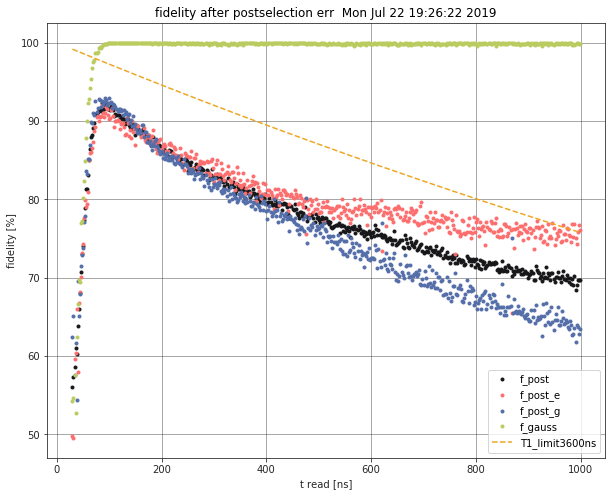

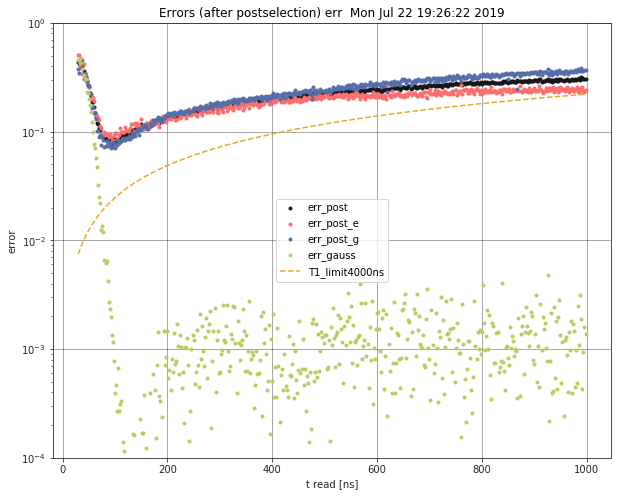

In [29]:
pic1 = plot_f_vs_tread(list_ssr_16)
pic2 = plot_err_vs_tread(list_ssr_16)


#### Rudat = 16 dB (more power), JPA ON

maximum fidelity postsel is: 92.33 %
optimal t read is 86.0  ns






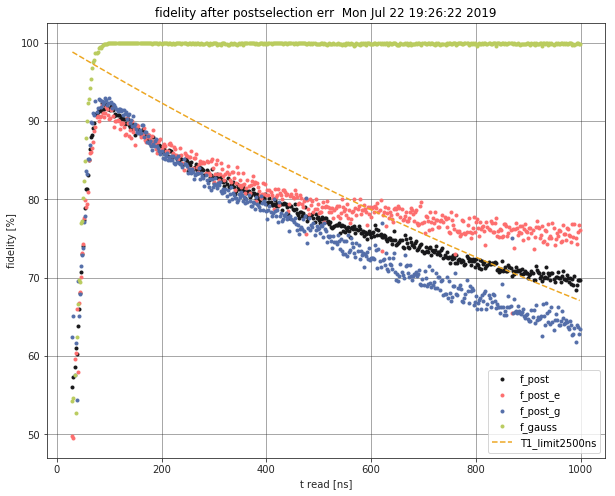

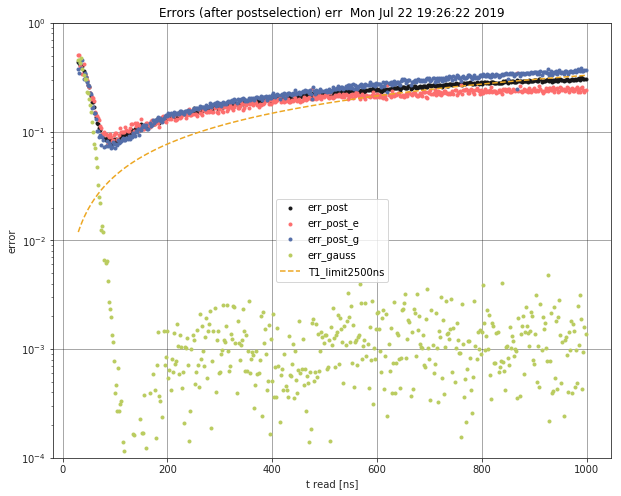

In [30]:
T1 = 2500
pic3 = plot_f_vs_tread(list_ssr_16,  t1=T1)
pic4 = plot_err_vs_tread(list_ssr_16, t1=T1)

# Plot seria of F_vs_t_read

In [31]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_16, fig_width=18, fig_high=12, save=True, fname='list_ssr_16_fid')
    pic2 = plot_err_vs_tread(list_ssr_16,fig_width=18, fig_high=12, save=True, fname='list_ssr_16_err')
except:
    print 'not succeed'
    

maximum fidelity postsel is: 92.33 %
optimal t read is 86.0  ns






In [32]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_19, fig_width=18, fig_high=12, save=True, fname='list_ssr_19_fid')
    pic2 = plot_err_vs_tread(list_ssr_19,fig_width=18, fig_high=12, save=True, fname='list_ssr_19_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 94.86 %
optimal t read is 164.0  ns






In [33]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_22, fig_width=18, fig_high=12, save=True, fname='list_ssr_22_fid')
    pic2 = plot_err_vs_tread(list_ssr_22,fig_width=18, fig_high=12, save=True, fname='list_ssr_22_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 95.49 %
optimal t read is 214.0  ns






In [34]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_22nj, fig_width=18, fig_high=12, save=True, fname='list_ssr_22nj_fid')
    pic2 = plot_err_vs_tread(list_ssr_22nj,fig_width=18, fig_high=12, save=True, fname='list_ssr_22nj_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 76.11 %
optimal t read is 996.0  ns






In [35]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_x1, fig_width=18, fig_high=12, save=True, fname='list_ssr_x1_fid')
    pic2 = plot_err_vs_tread(list_ssr_x1,fig_width=18, fig_high=12, save=True, fname='list_ssr_x1_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 98.52 %
optimal t read is 80.0  ns






In [36]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_x2, fig_width=18, fig_high=12, save=True, fname='list_ssr_x2_fid')
    pic2 = plot_err_vs_tread(list_ssr_x2,fig_width=18, fig_high=12, save=True, fname='list_ssr_x2_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 88.42 %
optimal t read is 18.0  ns






In [37]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_x3, fig_width=18, fig_high=12, save=True, fname='list_ssr_x3_fid')
    pic2 = plot_err_vs_tread(list_ssr_x3,fig_width=18, fig_high=12, save=True, fname='list_ssr_x3_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 99.19 %
optimal t read is 91.0  ns






In [38]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_x4, fig_width=18, fig_high=12, save=True, fname='list_ssr_x4_fid')
    pic2 = plot_err_vs_tread(list_ssr_x4,fig_width=18, fig_high=12, save=True, fname='list_ssr_x4_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 99.17 %
optimal t read is 86.0  ns






In [39]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_x5, fig_width=18, fig_high=12, save=True, fname='list_ssr_x5_fid')
    pic2 = plot_err_vs_tread(list_ssr_x5,fig_width=18, fig_high=12, save=True, fname='list_ssr_x5_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 99.2 %
optimal t read is 80.0  ns






In [40]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_x6, fig_width=18, fig_high=12, save=True, fname='list_ssr_x6_fid')
    pic2 = plot_err_vs_tread(list_ssr_x6,fig_width=18, fig_high=12, save=True, fname='list_ssr_x6_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 98.24 %
optimal t read is 137.0  ns






In [41]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_x7, fig_width=18, fig_high=12, save=True, fname='list_ssr_x7_fid')
    pic2 = plot_err_vs_tread(list_ssr_x7,fig_width=18, fig_high=12, save=True, fname='list_ssr_x7_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 95.77 %
optimal t read is 61.0  ns






In [42]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_x8, fig_width=18, fig_high=12, save=True, fname='list_ssr_x8_fid')
    pic2 = plot_err_vs_tread(list_ssr_x8,fig_width=18, fig_high=12, save=True, fname='list_ssr_x8_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 97.39 %
optimal t read is 105.0  ns






In [43]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_x9, fig_width=18, fig_high=12, save=True, fname='list_ssr_x9_fid')
    pic2 = plot_err_vs_tread(list_ssr_x9,fig_width=18, fig_high=12, save=True, fname='list_ssr_x9_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 92.15 %
optimal t read is 76.0  ns






In [44]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_x10, fig_width=18, fig_high=12, save=True, fname='list_ssr_x10_fid')
    pic2 = plot_err_vs_tread(list_ssr_x10,fig_width=18, fig_high=12, save=True, fname='list_ssr_x10_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 96.8 %
optimal t read is 120.0  ns






In [45]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_x11, fig_width=18, fig_high=12, save=True, fname='list_ssr_x11_fid')
    pic2 = plot_err_vs_tread(list_ssr_x11,fig_width=18, fig_high=12, save=True, fname='list_ssr_x11_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 95.81 %
optimal t read is 130.0  ns






In [46]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_x12, fig_width=18, fig_high=12, save=True, fname='list_ssr_x12_fid')
    pic2 = plot_err_vs_tread(list_ssr_x12,fig_width=18, fig_high=12, save=True, fname='list_ssr_x12_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 95.55 %
optimal t read is 240.0  ns






In [47]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_x13, fig_width=18, fig_high=12, save=True, fname='list_ssr_x13_fid')
    pic2 = plot_err_vs_tread(list_ssr_x13,fig_width=18, fig_high=12, save=True, fname='list_ssr_x13_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 0.0 %
optimal t read is 10.0  ns






In [48]:
### to plot
try:
    pic1 = plot_f_vs_tread(list_ssr_x14, fig_width=18, fig_high=12, save=True, fname='list_ssr_x14_fid')
    pic2 = plot_err_vs_tread(list_ssr_x14,fig_width=18, fig_high=12, save=True, fname='list_ssr_x14_err')
except:
    print 'not succeed'

maximum fidelity postsel is: 0.0 %
optimal t read is 10.0  ns






# Finish of plot one by one

# BEST FIDELITY RESULTS FOR EACH LIST

saving
It is no raw data. 
 loading...
data loaded
Distance:0.03; Theta: 25
Amp: 0.02; Phase:-155
Amp: 0.01; Phase: 27 
Ratio amps:  0.8
regime: raw_data


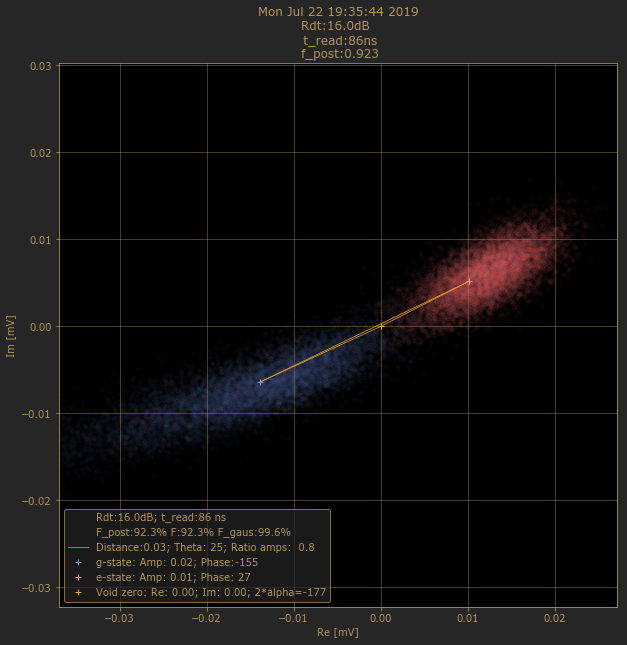

c:\python27\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


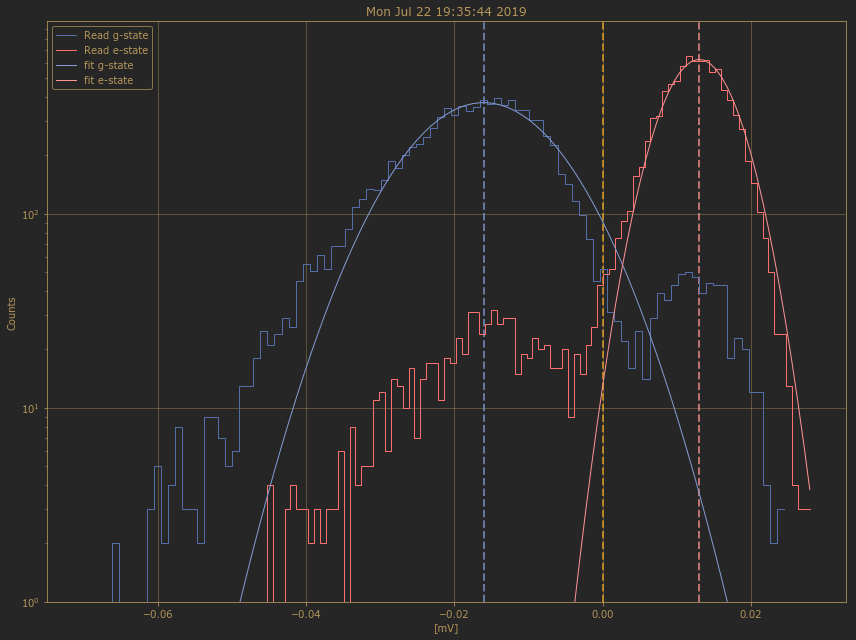

In [49]:
best_ind_16 = plot_best_res(list_ssr_16, save=True, fname='list_ssr_16_best')

saving
It is no raw data. 
 loading...
data loaded
Distance:0.03; Theta: 2
Amp: 0.04; Phase:-175
Amp: 0.01; Phase:-162
Ratio amps:  0.1
regime: raw_data


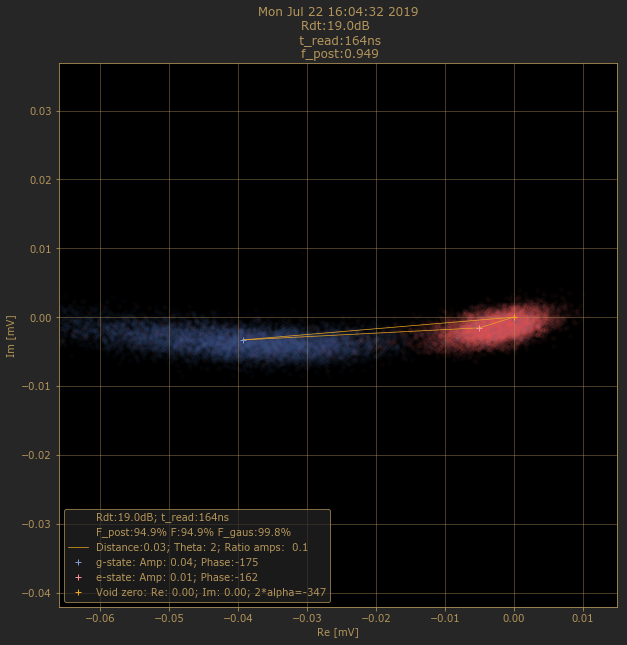

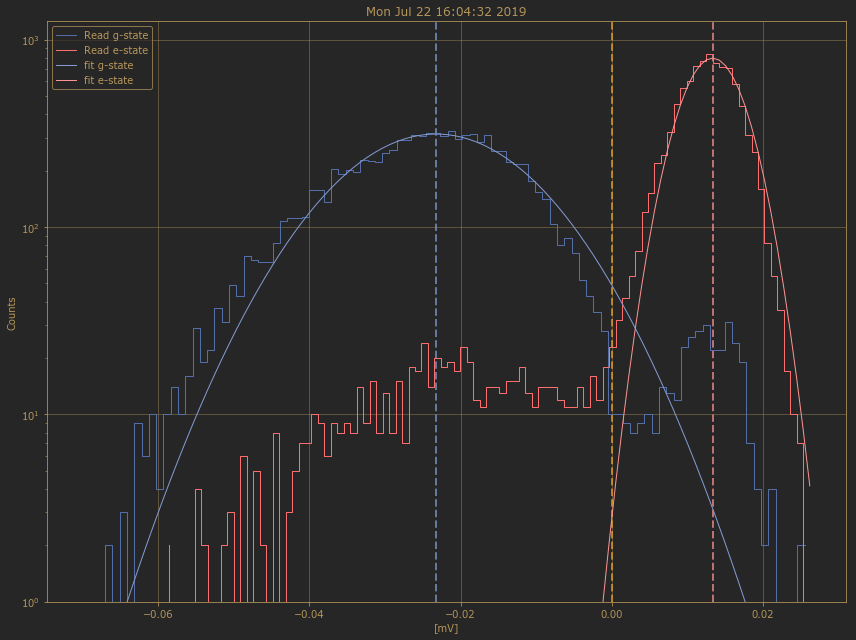

In [50]:
best_ind_19 = plot_best_res(list_ssr_19, save=True, fname='list_ssr_19_best')

saving
It is no raw data. 
 loading...
data loaded
Distance:0.04; Theta: 0
Amp: 0.04; Phase:-178
Amp: 0.00; Phase:-164
Ratio amps:  0.1
regime: raw_data


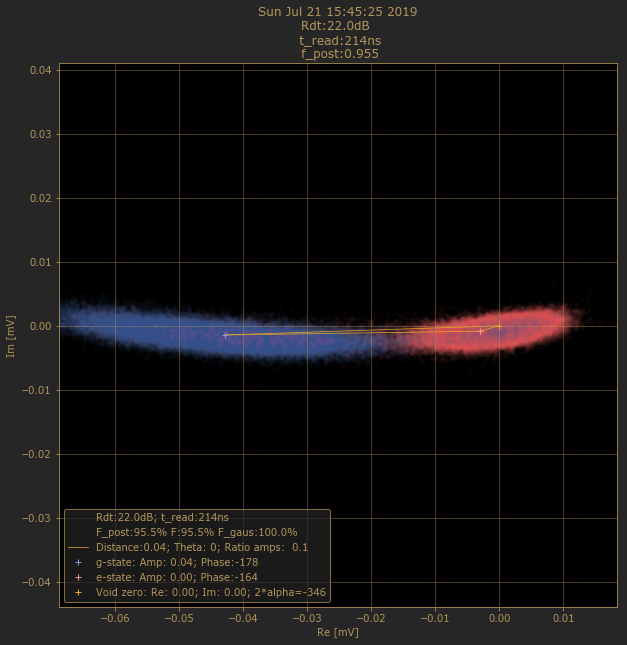

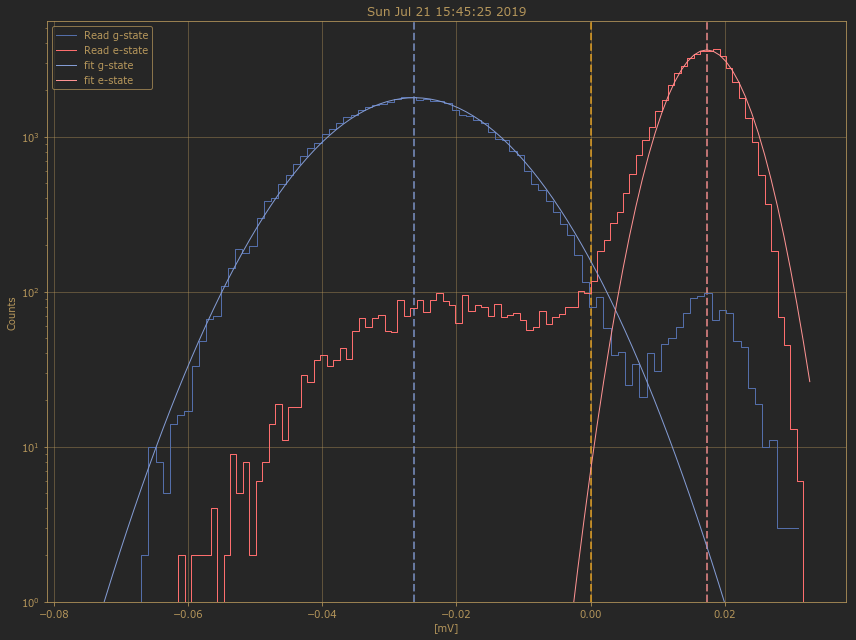

In [51]:
best_ind_22 = plot_best_res(list_ssr_22, save=True, fname='list_ssr_22_best')

saving
It is no raw data. 
 loading...
data loaded
Distance:0.00; Theta: 175
Amp: 0.00; Phase:-84 
Amp: 0.00; Phase:-119
Ratio amps:  1.1
regime: raw_data


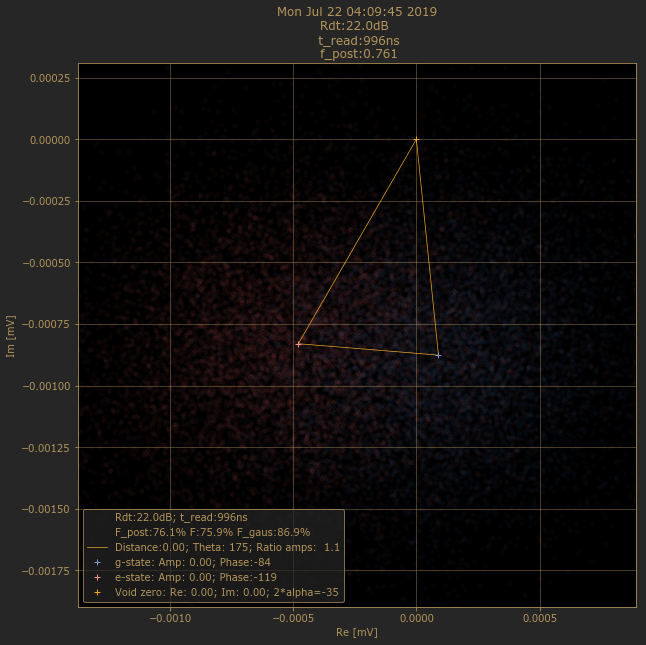

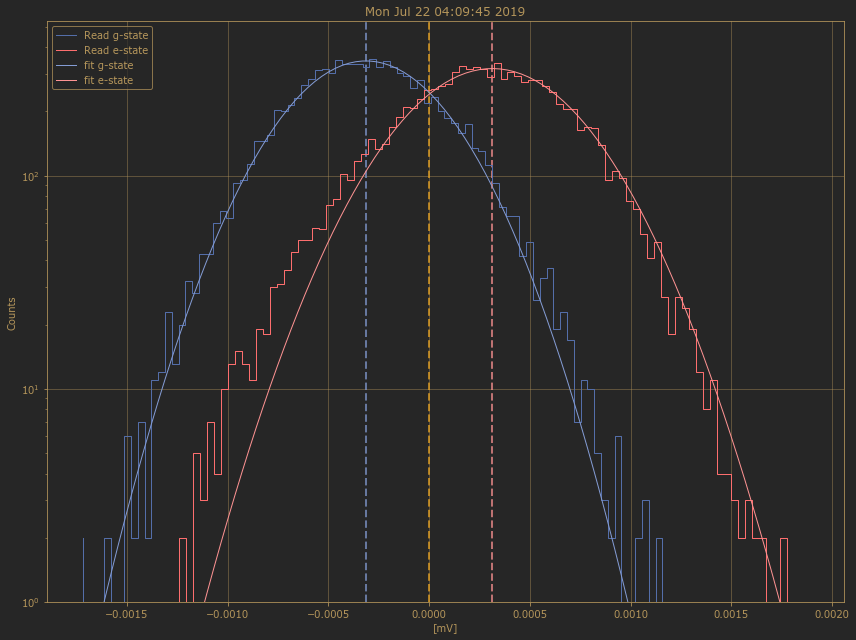

In [52]:
best_ind_22nj = plot_best_res(list_ssr_22nj, save=True, fname='list_ssr_22nj_best')

saving
It is no raw data. 
 loading...
data loaded
Distance:0.01; Theta:-11
Amp: 0.00; Phase: 175
Amp: 0.01; Phase:-14 
Ratio amps:  2.5
regime: raw_data


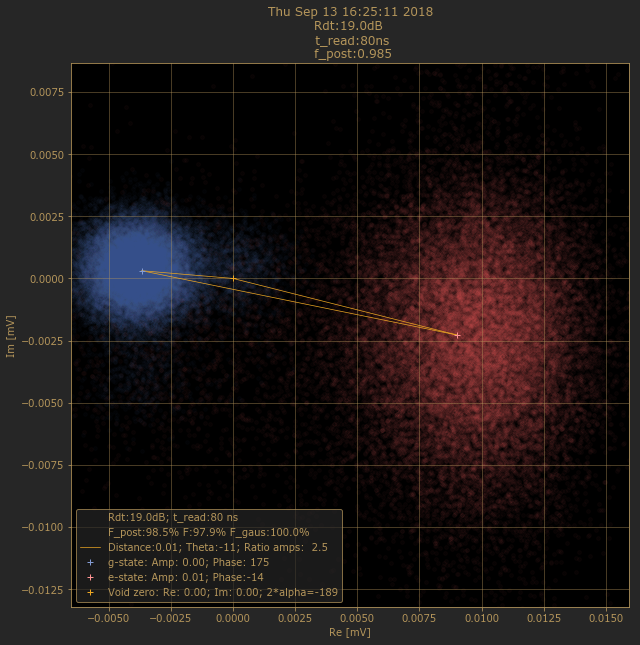

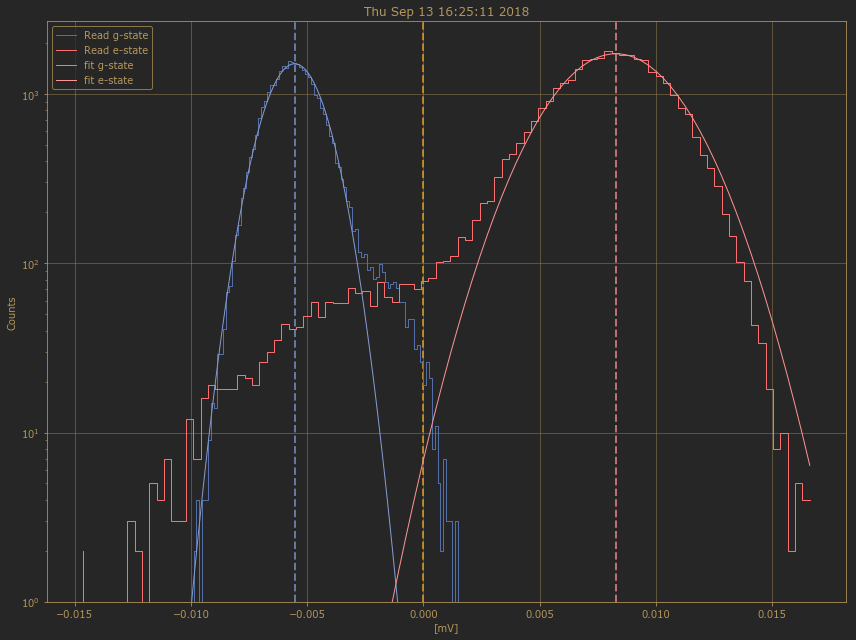

In [53]:
best_ind_x1 = plot_best_res(list_ssr_x1, save=True, fname='list_ssr_x1_best')

saving
It is no raw data. 
 loading...
data loaded
Distance:0.00; Theta:-28
Amp: 0.00; Phase: 167
Amp: 0.00; Phase:-35 
Ratio amps:  2.1
regime: raw_data


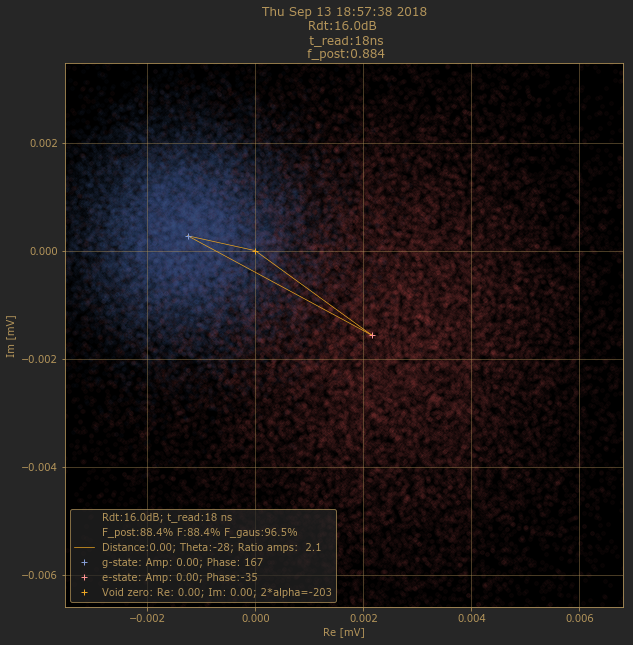

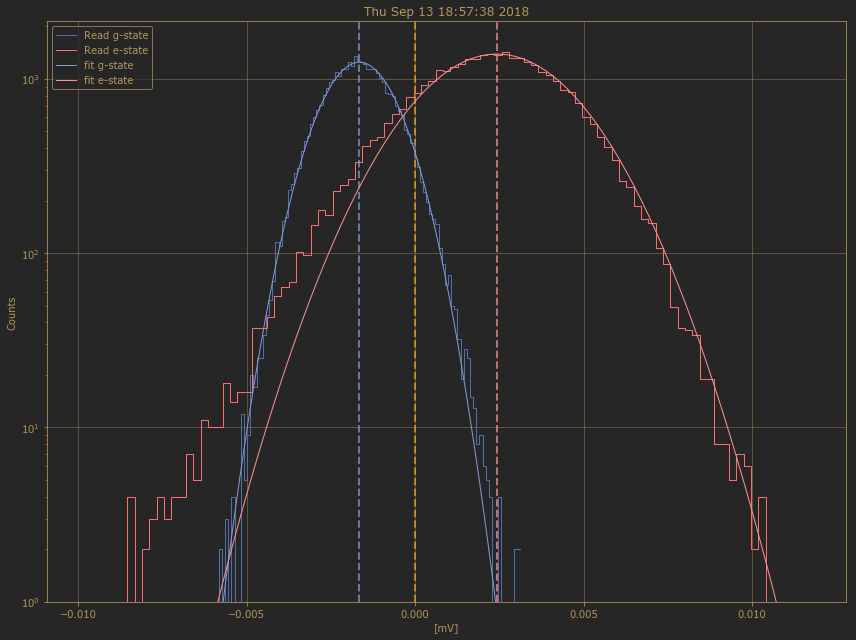

In [54]:
best_ind_x2 = plot_best_res(list_ssr_x2, save=True, fname='list_ssr_x2_best')

saving
It is no raw data. 
 loading...
data loaded
Distance:0.06; Theta:-0
Amp: 0.01; Phase:-176
Amp: 0.04; Phase:-1.7
Ratio amps:  3.3
regime: raw_data


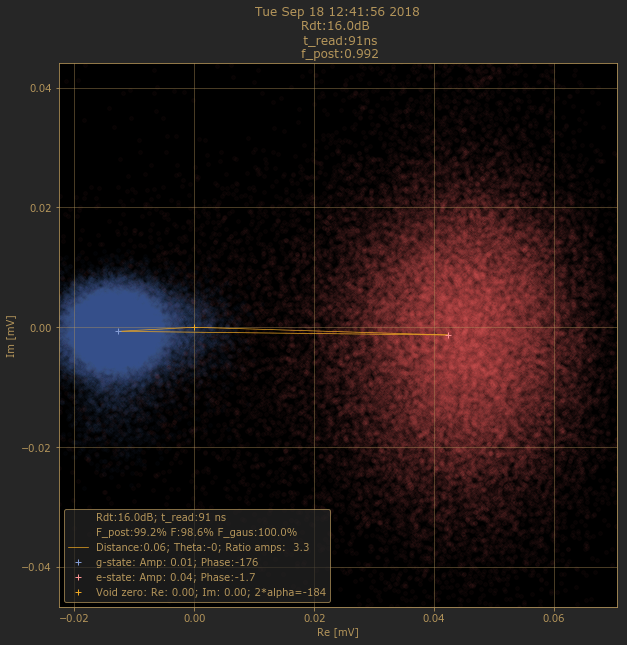

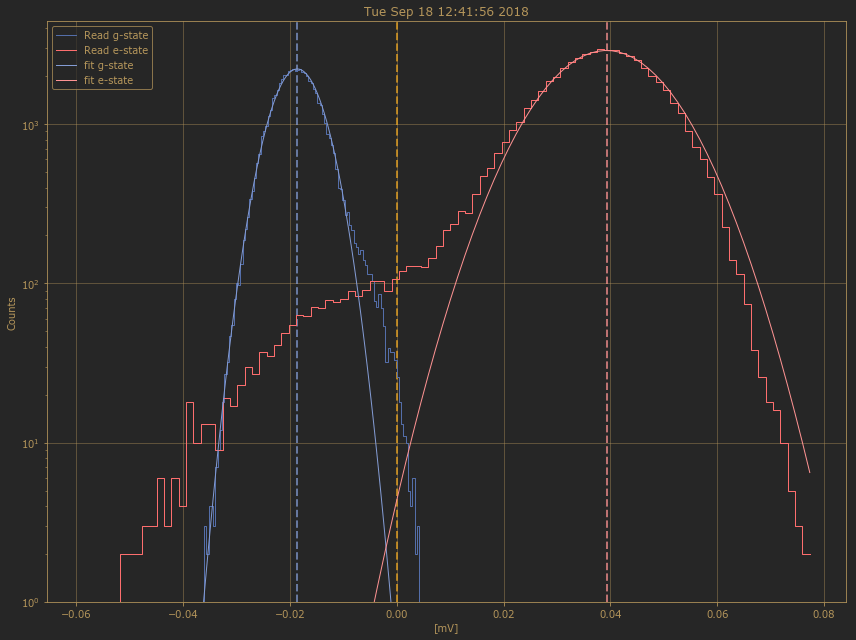

In [55]:
best_ind_x3 = plot_best_res(list_ssr_x3, save=True, fname='list_ssr_x3_best')

saving
It is no raw data. 
 loading...
data loaded
Distance:0.05; Theta: 1
Amp: 0.01; Phase:-174
Amp: 0.04; Phase: 0.4
Ratio amps:  3.4
regime: raw_data


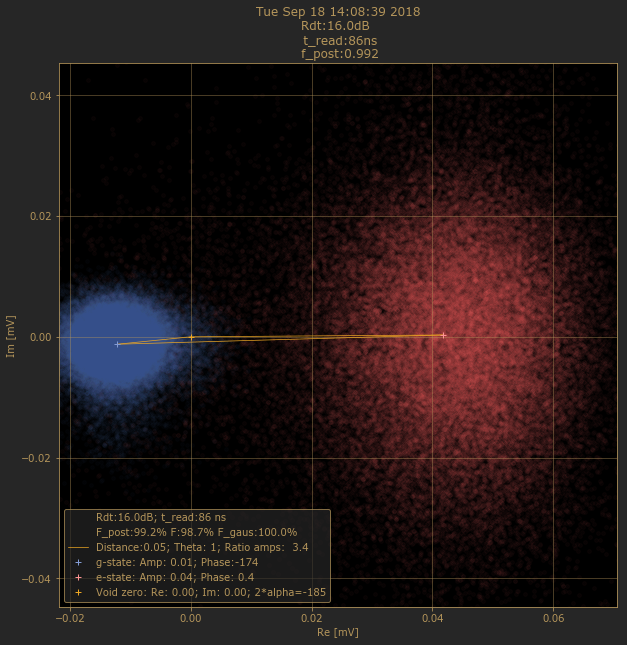

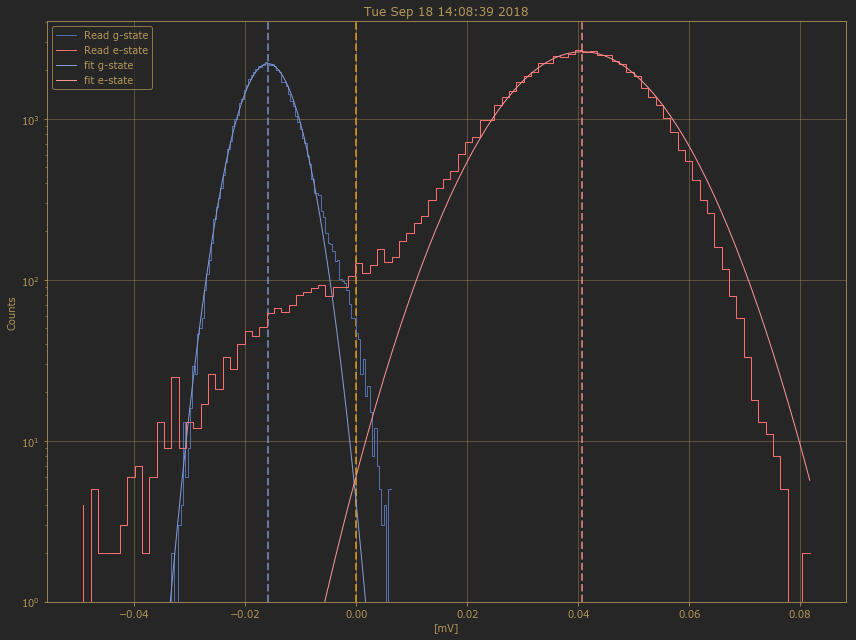

In [56]:
best_ind_x4 = plot_best_res(list_ssr_x4, save=True, fname='list_ssr_x4_best')

saving
It is no raw data. 
 loading...
data loaded
Distance:0.05; Theta: 3
Amp: 0.01; Phase:-172
Amp: 0.03; Phase: 2.4
Ratio amps:  3.0
regime: raw_data


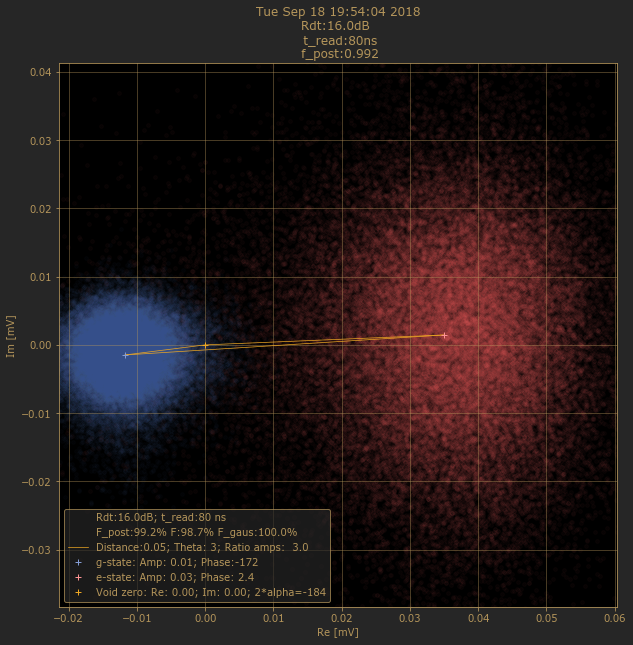

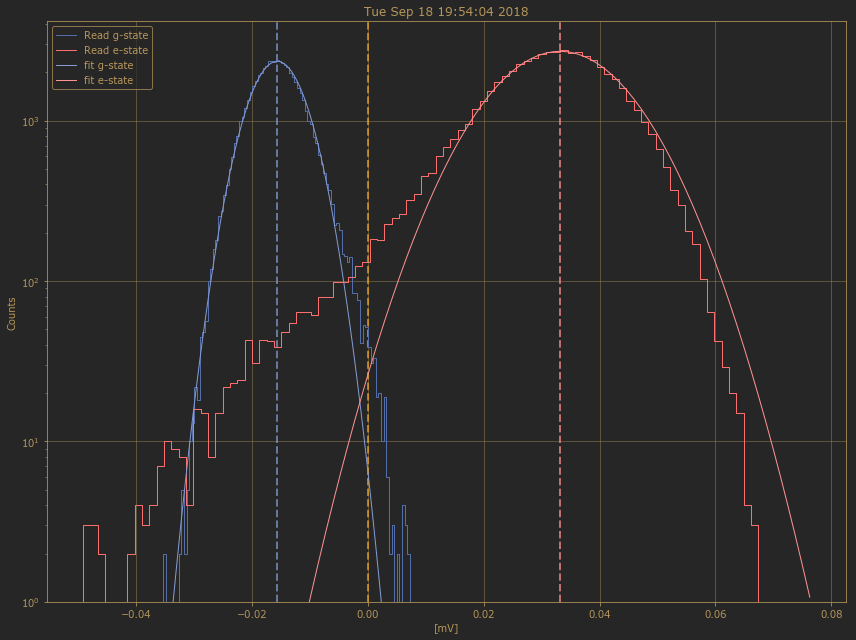

In [57]:
best_ind_x5 = plot_best_res(list_ssr_x5, save=True, fname='list_ssr_x5_best')

saving
It is no raw data. 
 loading...
data loaded
Distance:0.04; Theta:-10
Amp: 0.01; Phase:-9.0
Amp: 0.05; Phase:-10 
Ratio amps:  5.2
regime: raw_data


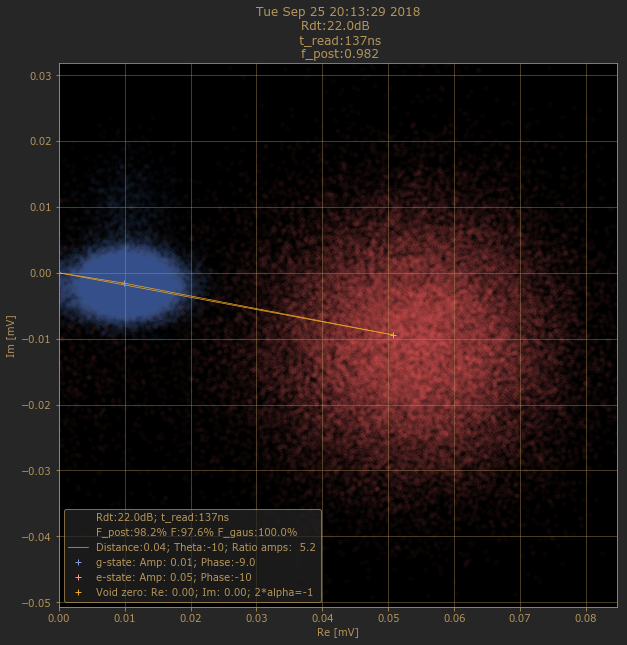

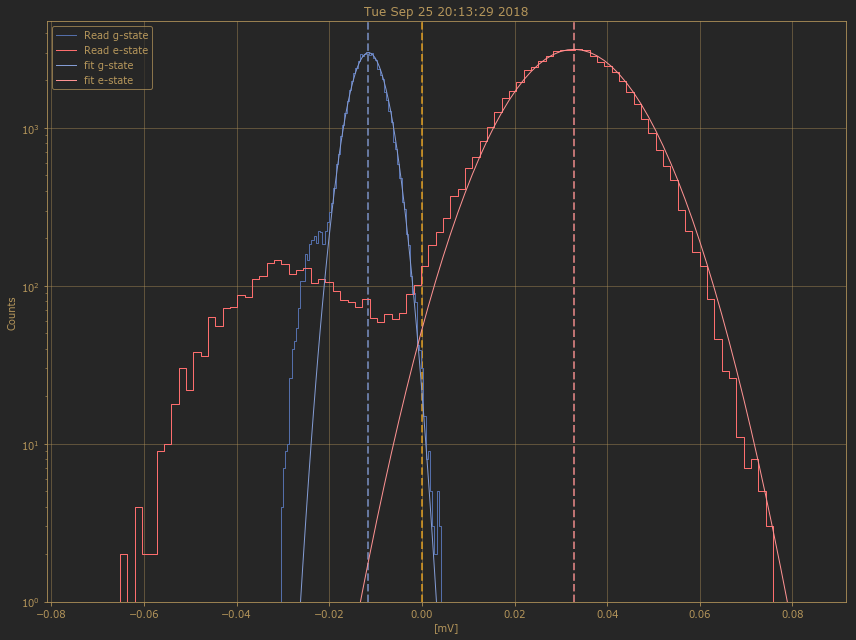

In [58]:
best_ind_x6 = plot_best_res(list_ssr_x6, save=True, fname='list_ssr_x6_best')

saving
It is no raw data. 
 loading...
data loaded
Distance:0.01; Theta:-43
Amp: 0.00; Phase:-41 
Amp: 0.01; Phase:-43 
Ratio amps:  6.3
regime: raw_data


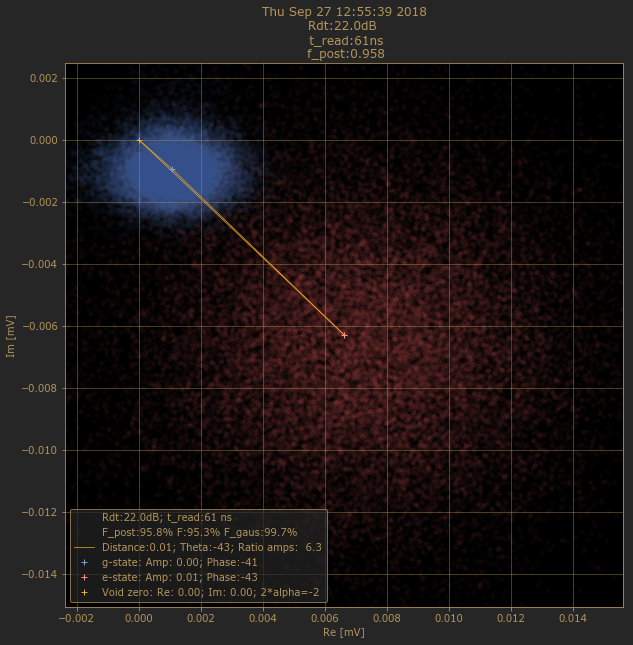

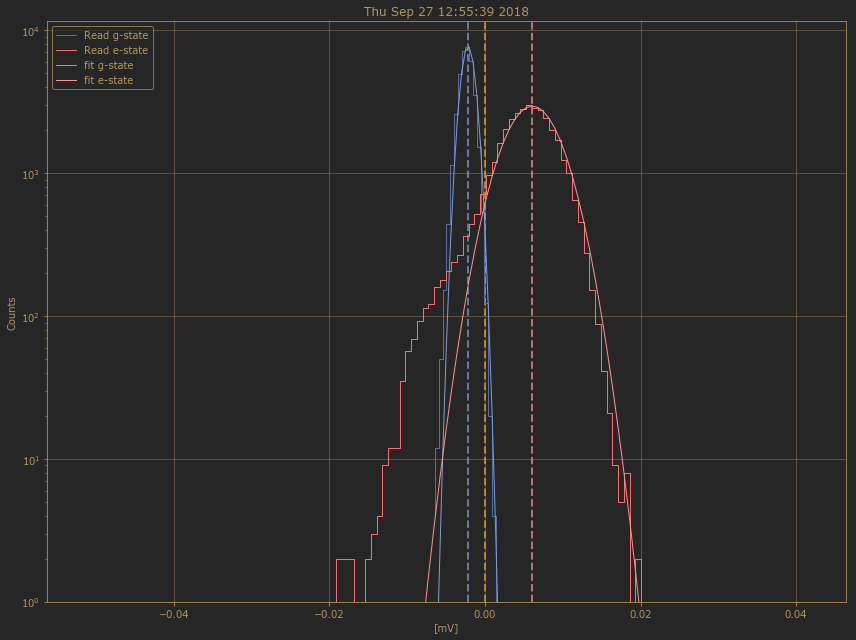

In [59]:
best_ind_x7 = plot_best_res(list_ssr_x7, save=True, fname='list_ssr_x7_best')

saving
It is no raw data. 
 loading...
data loaded
Distance:0.01; Theta:-41
Amp: 0.00; Phase:-35 
Amp: 0.01; Phase:-41 
Ratio amps:  6.3
regime: raw_data


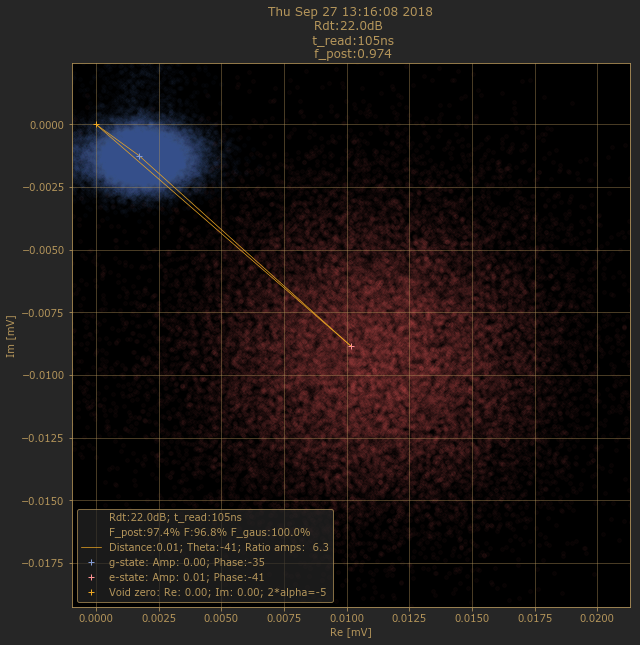

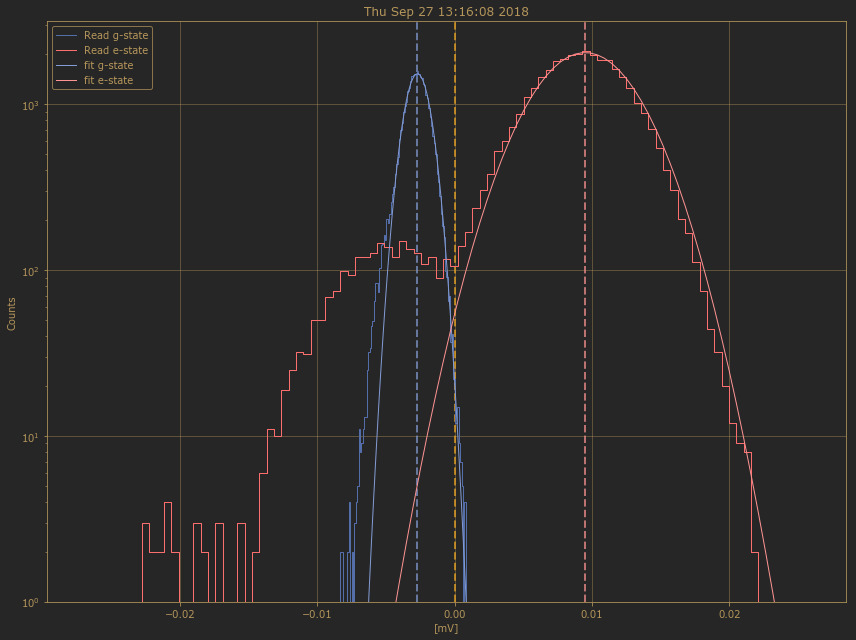

In [60]:
best_ind_x8 = plot_best_res(list_ssr_x8, save=True, fname='list_ssr_x8_best')

saving
It is no raw data. 
 loading...
data loaded
Distance:0.01; Theta:-39
Amp: 0.00; Phase:-36 
Amp: 0.01; Phase:-38 
Ratio amps:  2.9
regime: raw_data


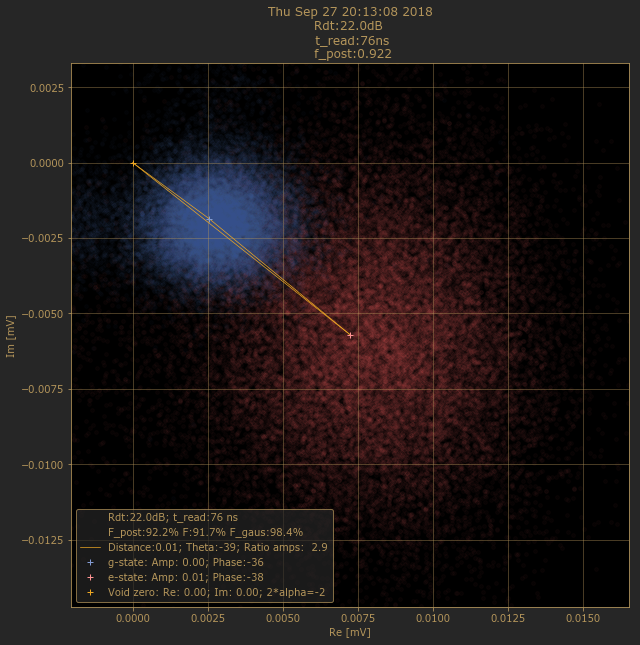

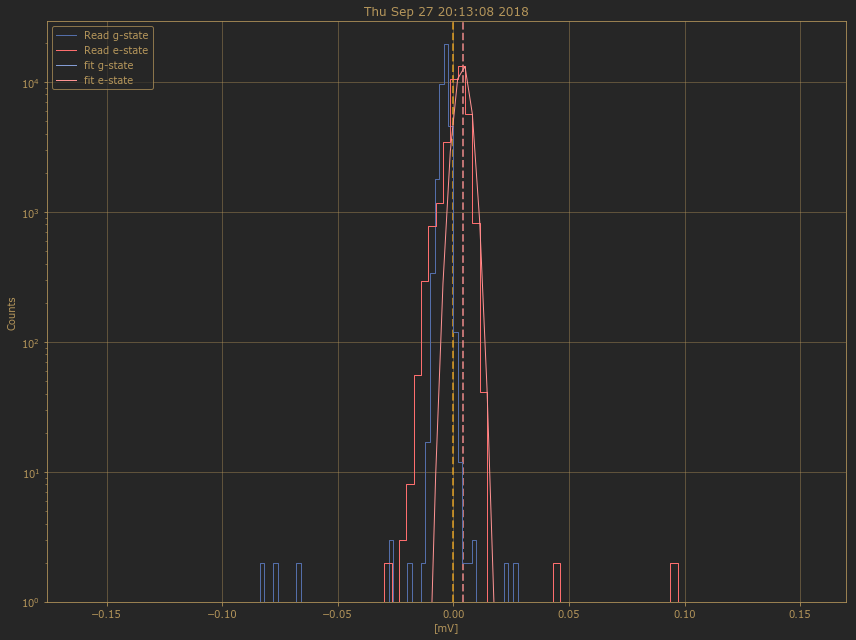

In [61]:
best_ind_x9 = plot_best_res(list_ssr_x9, save=True, fname='list_ssr_x9_best')

saving
It is no raw data. 
 loading...
data loaded
Distance:0.09; Theta:-20
Amp: 0.03; Phase: 149
Amp: 0.06; Phase:-14 
Ratio amps:  1.7
regime: raw_data


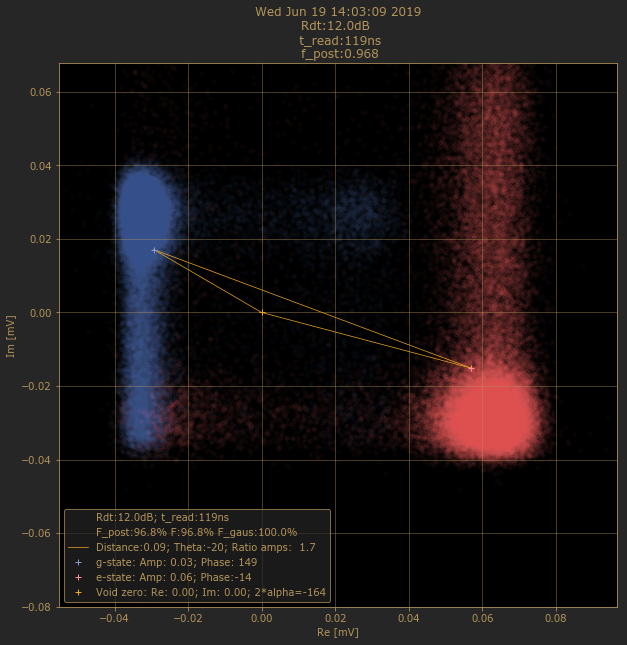

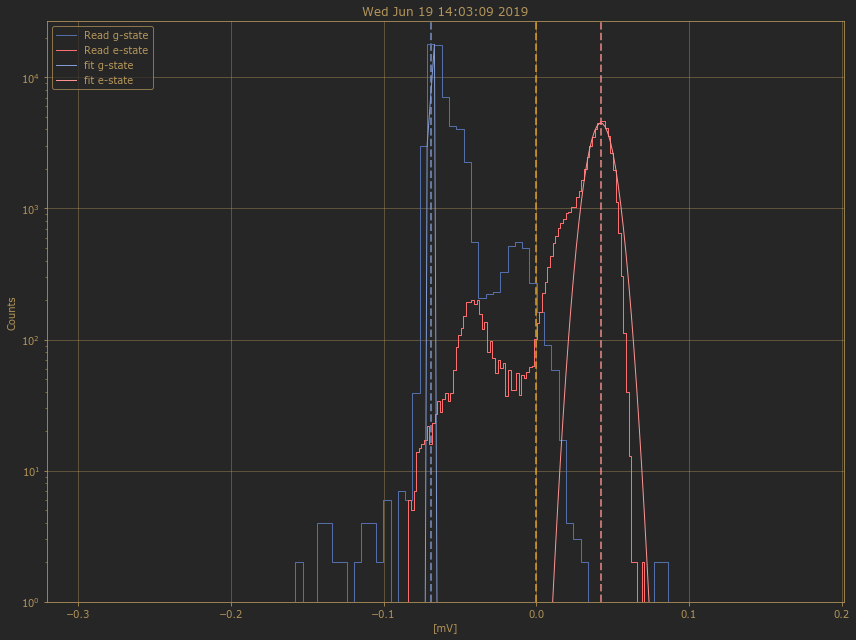

In [62]:
best_ind_x10 = plot_best_res(list_ssr_x10, save=True, fname='list_ssr_x10_best')

saving
It is no raw data. 
 loading...
data loaded
Distance:0.08; Theta:-39
Amp: 0.03; Phase: 125
Amp: 0.05; Phase:-31 
Ratio amps:  1.8
regime: raw_data


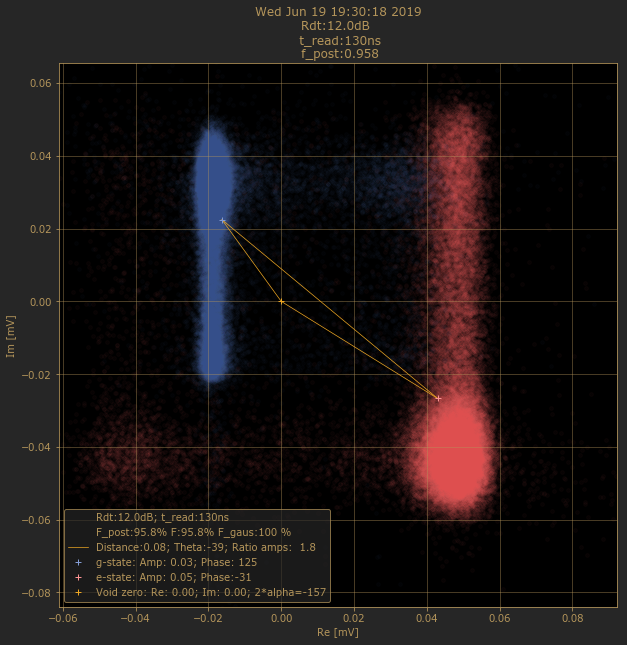

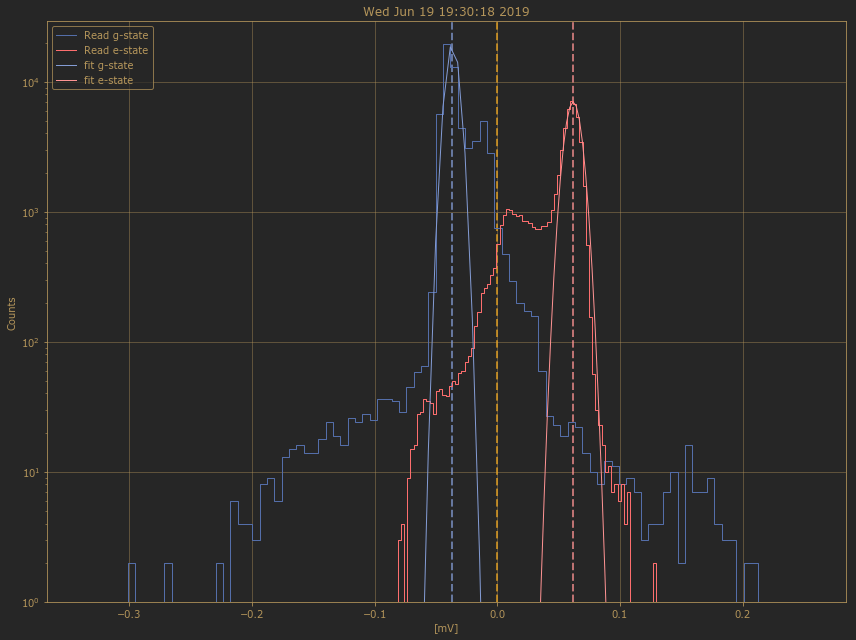

In [63]:
best_ind_x11 = plot_best_res(list_ssr_x11, save=True, fname='list_ssr_x11_best')

In [64]:
best_ind_x12 = plot_best_res(list_ssr_x12, save=True, fname='list_ssr_x12_best')

saving
It is no raw data. 
 loading...
data loaded


ValueError: cannot convert float NaN to integer

In [ ]:
best_ind_x13 = plot_best_res(list_ssr_x13, save=True, fname='list_ssr_x13_best')

In [ ]:
best_ind_x14 = plot_best_res(list_ssr_x14, save=True, fname='list_ssr_x14_best')

# DIG DEEPER

# x10,x11,x12,x13,x14 - ortogonal squeezing. Strange. Can not rpocess
## it all from 19 June of 2019

In [ ]:
i=50

In [ ]:
pic = list_ssr_x10[i].plot_scatter_two_blob(dark=True)
list_ssr_x10[i].dict_fidelity

In [ ]:
pic = list_ssr_x11[i].plot_scatter_two_blob(dark=True, figsize=[8,8])
list_ssr_x11[i].dict_fidelity

In [ ]:
pic = list_ssr_x12[i].plot_scatter_two_blob(dark=True)
list_ssr_x12[i].dict_fidelity

In [ ]:
pic = list_ssr_x13[i].plot_scatter_two_blob(dark=True)
list_ssr_x13[i].dict_fidelity

In [ ]:
pic = list_ssr_x14[i].plot_scatter_two_blob(dark=True)
list_ssr_x14[i].dict_fidelity

In [ ]:
ssr1 = list_ssr_22nj[10]

In [ ]:
[fig, ax] = ssr1.plot_scatter_two_blob(dark=True, show=False)

In [ ]:
fig

# ____TO ONLY MAKE GIF____

In [114]:
# def anim_from_list(anim_list, fps=4, limits=None, name='anim.gif',
#                    figsize=None, savepath='C:\Users\V\Scripts\SingleShotReadout\pics\gif_test'+'\\', save_frames=False):
#     '''
#     Takes list of SSR. 
#     Make animated GIF
#     '''
#     def plot_ssr_from_list(list_ssr, i):
#         '''
#         takes 
#         '''
#         ssr1 = list_ssr[i] 
#         ### for new core
#         if limits is None:
#             [fig, ax] = ssr1.plot_scatter_two_blob(dark=True, show=False, figsize=figsize, figax_return=True)
#         else:
#             [fig, ax] = ssr1.plot_scatter_two_blob(dark=True, show=False,
#                                                    limits=limits, crop=False, figsize=figsize, figax_return=True)
#         ssr1.erase_data('all')
        
#         # Used to return the plot as an image rray
#         fig.canvas.draw()       # draw the canvas, cache the renderer
#         image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
#         image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

#         return image
    
     
#     path = savepath + name
#     import imageio
    
#     kwargs_write = {'fps':1.0, 'quantizer':'nq'}
#     imageio.mimsave(path, [plot_ssr_from_list(anim_list, i) for i in range(len(anim_list) -1)], fps=fps)
    
    
#     return True

In [115]:
# path_xxx = path22
# name_xxx = 'f22.gif'

In [116]:
# [list_dat_xxx, list_param_xxx] = get_adress_lists(path_xxx)
# print 'Prepare to load ', len(list_dat_xxx), ' files...'

# try:
#     list_ssr_xxx = load_data(list_dat_xxx, list_param_xxx)
# except:
#         print 'cant load! \n STOP!'

In [118]:
# list_ssr_xxx = list_ssr_22

In [119]:
# print len(list_ssr_xxx)

In [120]:
# list_ssr_xxx1[0].plot_hists()

In [121]:
# list_ssr_xxx1[0].plot_scatter_two_blob()

In [122]:
# print len(list_ssr_xxx)

# # list_ssr_xxx1 = list_ssr_xxx[0: len(list_ssr_xxx): 4]

# list_ssr_xxx1 = [list_ssr_xxx[1], list_ssr_xxx[11], list_ssr_xxx[21],list_ssr_xxx[31],list_ssr_xxx[41]] 

# print len(list_ssr_xxx1)

In [123]:
# ### try to save just pics
# path_for_all = 'C:\Users\V\Scripts\SingleShotReadout\pics\gif_test\f22_all'
# anim_from_list(list_ssr_xxx, limits = [-0.07, 0.02, 0.01, -0.01], name=name_xxx, figsize=[16,9], save_frames=True, savepath=path_for_all)

In [124]:
# anim_from_list(list_ssr_xxx1, name='wtf.gif')

# Ok f*ck it. Too heavy for memory. Plot pics one by one. Make GIF by other soft-solution

In [192]:
def pic_seq(list_ssr, listname, limits=None, figsize=None, path='pics\\gif_test\\test_seq_22\\', start_ind=None, stop_ind=None):
    '''
    save all pics of ssr with numerated names
    '''
    
    if start_ind is None and stop_ind is None:
        i_values = range(len(list_ssr))
    else:
        if start_ind is None:
            start_ind = 0 
        if stop_ind is None:
            stop_ind = len(list_ssr)
            
        i_values = range(start_ind, stop_ind)
    
    for i in i_values:
        ssr = list_ssr[i]
        name = listname +'_'+ str(i)
        
        if limits is None:
            pic = ssr.plot_scatter_two_blob(dark=True, show=False, figsize=figsize, save=True,
                                            savepath=path, fname=name)
        else:
            pic = ssr.plot_scatter_two_blob(dark=True, show=False, limits=limits, crop=False,
                                            figsize=figsize, save=True, savepath=path, fname=name)
        ssr.erase_data('all')
        del pic
    
    return True
    

Distance:0.04; Theta: 1
Amp: 0.04; Phase:-178
Amp: 0.00; Phase:-169
Ratio amps:  0.1


MemoryError: 

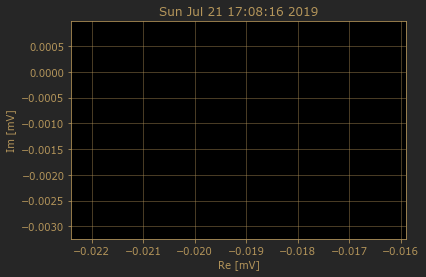

In [201]:
### example of save
ssr = list_ssr_22[212]
path='pics\\gif_test\\test_seq_22\\'
i=212
listname = 'f22'
name = listname +'_'+ str(i)

pic = ssr.plot_scatter_two_blob(dark=True, show=False, figsize=None, save=True, savepath=path, fname=name)

In [198]:
ssr = list_ssr_22[160]

In [199]:
ssr.plot_scatter_two_blob(dark=True, limits=[-0.08, 0.02, 0.01, -0.01], crop=False, figsize=[16,9])

It is no raw data. 
 loading...
Warning load_data() error!
can not load file:  C:\Users\V\Scripts\SingleShotReadout\Fid_vs_tread_VS__Rudat\Rdt=22_jpa_144004_______Fidelity_vs_time\All_here_rdt=22\163219_SingleShot\163219_SingleShot.dat
load was not successful


In [200]:
ssr.plot_scatter_two_blob(dark=True, limits=[-0.08, 0.02, 0.01, -0.01], crop=False)

It is no raw data. 
 loading...
Warning load_data() error!
can not load file:  C:\Users\V\Scripts\SingleShotReadout\Fid_vs_tread_VS__Rudat\Rdt=22_jpa_144004_______Fidelity_vs_time\All_here_rdt=22\163219_SingleShot\163219_SingleShot.dat
load was not successful


In [ ]:
print stop

# Think before run it

Distance:0.03; Theta: 2
Amp: 0.04; Phase:-175
Amp: 0.00; Phase:-159
Ratio amps:  0.1
All data erased!
It is no raw data. 
 loading...
data loaded
Distance:0.03; Theta: 2
Amp: 0.04; Phase:-175
Amp: 0.00; Phase:-162
Ratio amps:  0.1


MemoryError: 

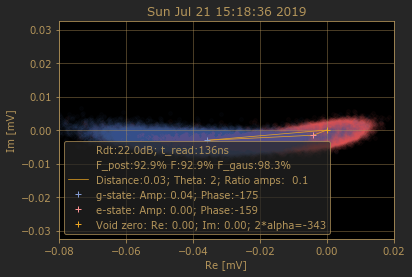

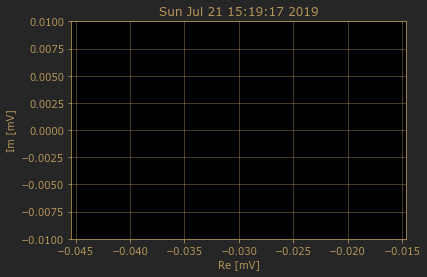

In [194]:
pic_seq(list_ssr_22, 'f22', limits=[-0.08, 0.02, 0.01, -0.01], start_ind=53, stop_ind=55)

Distance:0.04; Theta: 1
Amp: 0.04; Phase:-178
Amp: 0.00; Phase:-169
Ratio amps:  0.1


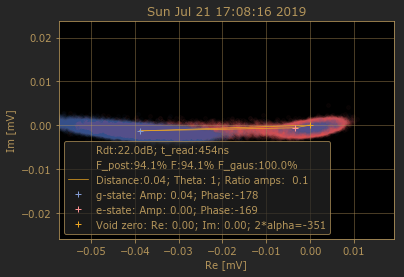

# FINISH FINISH FINISH

In [ ]:
print stop

## Plot fid_vs_tread for different pulse power in one window

In [ ]:
def plot_f_vs_tread_vs_rudat(list_of_list_dicts, wanted_parameter='F_post'):
    
    
    fig = plt.figure(figsize=[15,7])
    ax = fig.add_subplot(1, 1, 1)
    
    for list_dicts in list_of_list_dicts:

        list_tread = []
        list_f_post = []

        for linedic in list_dicts:
            list_tread.append( 1e9 * linedic[0]['t_read']  )

            list_f_post.append( 100* linedic[1][wanted_parameter]  )

        ax.plot( list_tread, list_f_post,   '.', label='rudat= '+str(linedic[0]['rudat']))
   
    ax.set_title(wanted_parameter)
    ax.set_ylabel('fidelity [%]')
    ax.set_xlabel('t read [ns]')
#     ax.set_yscale('log')
    ax.set_ylim([50,100])
#     ax.set_xlim([0,100])
    ax.legend()



### Show blolbs for given t_read

In [ ]:
def blob_with_tread(tread, list_dicts):
    '''
    takes wanted value in ns
    takes list of dictionaries (find filename there)
    '''
    
    list_difference = []
    for linedic in list_dicts:
        list_difference.append( abs(tread - 1e9 * linedic[0]['t_read']) )
        
    wanted_arg = np.argmin(list_difference)
    wanted_dic_line = list_dicts[wanted_arg]
    
    SRR_obj = SSResult(wanted_dic_line[3], paramfile = wanted_dic_line[4])
    pic1 = SRR_obj.plot_scatter_two_blob(dark=True, crop=False, renorm=False)
    pic2 = SRR_obj.plot_hist_1D_withpost()
#     return [pic1,pic2]
    return wanted_dic_line
    


### T1:
#### 16dB  ---     3300 - 3500 ns

#### 19dB  ---     3300 - 3400 ns

#### 22dB  ---     3500 - 3700 ns

#### 22dB (nojpa) 3300 - 3400 ns

In [ ]:
list_of_lists = [list_dicts22nj, list_dicts22, list_dicts19, list_dicts16]
plot_f_vs_tread_vs_rudat(list_of_lists, wanted_parameter='F')
plot_f_vs_tread_vs_rudat(list_of_lists, wanted_parameter='F_post')
